In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd

%matplotlib inline
pd.options.display.max_columns=99


In [2]:
#whr2013 = pd.read_csv('World Happiness Report 2013.csv', sep=",")#exclude since 2014 is missing

whr2015 = pd.read_csv('World Happiness Report 2015.csv', sep=",")
whr2016 = pd.read_csv('World Happiness Report 2016.csv', sep=",")
whr2017 = pd.read_csv('World Happiness Report 2017.csv', sep=",")
whr2018 = pd.read_csv('World Happiness Report 2018.csv', sep=",")
whr2019 = pd.read_csv('World Happiness Report 2019.csv', sep=",")
whr2020 = pd.read_csv('World Happiness Report 2020.csv', sep=",")
whr2021 = pd.read_csv('World Happiness Report 2021.csv', sep=",")
whr2022 = pd.read_csv('World Happiness Report 2022.csv', sep=",")
whr2023 = pd.read_csv('World Happiness Report 2023.csv', sep=",")


#whrcombined = pd.read_csv('WorldHappinessIndex2013-2023.csv', sep=",")

#precombined file excludes too many columns so I need to manually create one

In [3]:
df_list = [whr2015, whr2016, whr2017, whr2018, whr2019, whr2020, whr2021, whr2022, whr2023]

In [4]:
year=2015
for df in df_list:
    print(year)
    print(df.columns)
    year+=1

2015
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

In [5]:
#Standardize Column Names Across Years
whr2015 = whr2015.rename(columns={
    'Happiness Rank': 'Rank',
    'Happiness Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Health (Life Expectancy)': 'Health Life Expectancy',
    'Trust (Government Corruption)': 'Trust Government Corruption',
    'Family' : 'Family Social Support'
})
whr2016 = whr2016.rename(columns={
    'Happiness Rank': 'Rank',
    'Happiness Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Health (Life Expectancy)': 'Health Life Expectancy',
    'Trust (Government Corruption)': 'Trust Government Corruption',
    'Family' : 'Family Social Support'
})
whr2017 = whr2017.rename(columns={
    'Happiness.Rank': 'Rank',
    'Happiness.Score': 'Happiness Score',
    'Whisker.high': 'Whisker High',
    'Whisker.low': 'Whisker Low',
    'Economy..GDP.per.Capita.': 'GDP per Capita',
    'Health..Life.Expectancy.': 'Health Life Expectancy',
    'Trust..Government.Corruption.': 'Trust Government Corruption',
    'Dystopia.Residual': 'Dystopia Residual',
    'Family' : 'Family Social Support'
})
whr2018 = whr2018.rename(columns={
    'Overall rank': 'Rank',
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP per Capita',
    'Healthy life expectancy': 'Health Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust Government Corruption',
    'Social support' : 'Family Social Support'
})
whr2019 = whr2019.rename(columns={
    'Overall rank': 'Rank',
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP per Capita',
    'Healthy life expectancy': 'Health Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust Government Corruption',
    'Social support' : 'Family Social Support'
})
whr2020 = whr2020.rename(columns={
    'Country name': 'Country',
    'Regional indicator': 'Region',
    'Ladder score': 'Happiness Score',
    'upperwhisker': 'Whisker High',
    'lowerwhisker': 'Whisker Low',
    'Explained by: Log GDP per capita': 'GDP per Capita',
    'Healthy life expectancy': 'Health Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust Government Corruption',
    'Ladder score in Dystopia': 'Dystopia Residual',
    'Social support' : 'Family Social Support'
})
whr2021 = whr2021.rename(columns={
    'Country name': 'Country',
    'Regional indicator': 'Region',
    'Ladder score': 'Happiness Score',
    'upperwhisker': 'Whisker High',
    'lowerwhisker': 'Whisker Low',
    'Explained by: Log GDP per capita': 'GDP per Capita',
    'Healthy life expectancy': 'Health Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust Government Corruption',
    'Ladder score in Dystopia': 'Dystopia Residual',
    'Social support' : 'Family Social Support'
})
whr2022 = whr2022.rename(columns={
    'RANK': 'Rank',
    'Happiness score': 'Happiness Score',
    'Whisker-high': 'Whisker High',
    'Whisker-low': 'Whisker Low',
    'Dystopia (1.83) + residual': 'Dystopia Residual',
    'Explained by: GDP per capita': 'GDP per Capita',
    'Explained by: Social support': 'Family Social Support',
    'Explained by: Healthy life expectancy': 'Health Life Expectancy',
    'Explained by: Freedom to make life choices': 'Freedom',
    'Explained by: Generosity': 'Generosity',
    'Explained by: Perceptions of corruption': 'Trust Government Corruption',
    'Social support' : 'Family Social Support'
})
whr2023 = whr2023.rename(columns={
    'Country name': 'Country',
    'Ladder score': 'Happiness Score',
    'upperwhisker': 'Whisker High',
    'lowerwhisker': 'Whisker Low',
    'Dystopia + residual': 'Dystopia Residual',
    'Explained by: Log GDP per capita': 'GDP per Capita',
    'Social support': 'Social support',
    'Healthy life expectancy': 'Health Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Trust Government Corruption',
    'Social support' : 'Family Social Support'
})

df_combine_list=[whr2015, whr2016, whr2017, whr2018, whr2019, whr2020, whr2021, whr2022, whr2023]
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year, df in zip(years, df_combine_list):
    df['Year'] = year

whr_merged = pd.concat(df_combine_list, ignore_index=True, sort=False)




#Regions are missing from some years so lets fix that
#Create a mapping of countries to regions from the rows where 'Region' is not null
country_region_map = whr_merged.dropna(subset=['Region']).drop_duplicates('Country').set_index('Country')['Region'].to_dict()
#print(country_region_map)
#Fill missing 'Region' values using the map
whr_merged['Region'] = whr_merged.apply(lambda row: country_region_map.get(row['Country'], row['Region']) if pd.isnull(row['Region']) else row['Region'], axis=1)


# Define a dictionary to map the old regions to the new consolidated region names
region_mapping = {
    'Southern Asia': 'South and Southeast Asia',
    'Southeastern Asia': 'South and Southeast Asia',
    'South Asia': 'South and Southeast Asia',
    'Southeast Asia': 'South and Southeast Asia',
    'North America and ANZ': 'North America',
    'Middle East and Northern Africa': 'Middle East and North Africa',
    'Eastern Asia': 'East Asia',
    'Commonwealth of Independent States': 'Central and Eastern Europe'
}
# Use the map function to replace old region names with the new consolidated names
whr_merged['Region'] = whr_merged['Region'].map(region_mapping).fillna(whr_merged['Region'])

whr_merged.loc[whr_merged['Country' ]=='New Zealand', 'Region']= 'Australia and New Zealand'
whr_merged.loc[whr_merged['Country' ]=='Australia', 'Region']= 'Australia and New Zealand'

#manually fix health life expectancy for years 2020,2021,2022,2023
whr_merged.loc[whr_merged['Health Life Expectancy'] > 2, 'Health Life Expectancy'] /= 100

#2020,21,23 is missing ranks so lets generate it based on happiness score
for year in [2020,2021,2023]:
    df = whr_merged[whr_merged['Year'] == year]
    df = df.sort_values(by='Happiness Score', ascending=False)
    df['Rank'] = df['Happiness Score'].rank(method='first', ascending=False)
    
    whr_merged.update(df[['Rank']])
whr_merged

Country                        Region   Rank  Happiness Score  \
0          Switzerland                Western Europe    1.0            7.587   
1              Iceland                Western Europe    2.0            7.561   
2              Denmark                Western Europe    3.0            7.527   
3               Norway                Western Europe    4.0            7.522   
4               Canada                 North America    5.0            7.427   
...                ...                           ...    ...              ...   
1362  Congo (Kinshasa)            Sub-Saharan Africa  133.0            3.207   
1363          Zimbabwe            Sub-Saharan Africa  134.0            3.204   
1364      Sierra Leone            Sub-Saharan Africa  135.0            3.138   
1365           Lebanon  Middle East and North Africa  136.0            2.392   
1366       Afghanistan      South and Southeast Asia  137.0            1.859   

      Standard Error  GDP per Capita  Family Social Support  \
0            0.03411         1.39651                1.34951   
1            0.04884         1.30232                1.40223   
2            0.03328         1.32548                1.36058   
3            0.03880         1.45900                1.33095   
4            0.03553         1.32629                1.32261   
...              ...             ...                    ...   
1362             NaN         0.53100                0.65200   
1363             NaN         0.75800                0.69000   
1364             NaN         0.67000                0.55500   
1365             NaN         1.41700                0.53000   
1366             NaN         0.64500                0.34100   

      Health Life Expectancy  Freedom  Trust Government Corruption  \
0                    0.94143  0.66557                      0.41978   
1                    0.94784  0.62877                      0.14145   
2                    0.87464  0.64938                      0.48357   
3                    0.88521  0.66973                      0.36503   
4                    0.90563  0.63297                      0.32957   
...                      ...      ...                          ...   
1362                 0.55375  0.66400                      0.83400   
1363                 0.54050  0.65400                      0.76600   
1364                 0.54900  0.66000                      0.85800   
1365                 0.66149  0.47400                      0.89100   
1366                 0.54712  0.38200                      0.84700   

      Generosity  Dystopia Residual  Year  Lower Confidence Interval  \
0        0.29678            2.51738  2015                        NaN   
1        0.43630            2.70201  2015                        NaN   
2        0.34139            2.49204  2015                        NaN   
3        0.34699            2.46531  2015                        NaN   
4        0.45811            2.45176  2015                        NaN   
...          ...                ...   ...                        ...   
1362     0.08600            1.16200  2023                        NaN   
1363    -0.04600            0.90500  2023                        NaN   
1364     0.10500            1.22100  2023                        NaN   
1365    -0.14100           -0.11000  2023                        NaN   
1366    -0.08100            0.97600  2023                        NaN   

      Upper Confidence Interval  Whisker High  Whisker Low  \
0                           NaN           NaN          NaN   
1                           NaN           NaN          NaN   
2                           NaN           NaN          NaN   
3                           NaN           NaN          NaN   
4                           NaN           NaN          NaN   
...                         ...           ...          ...   
1362                        NaN         3.394        3.020   
1363                        NaN         3.323        3.084   
1364                        NaN  

In [6]:
#whr_merged[whr_merged['Dystopia + residual'].notnull()]
whr_merged_sliced = whr_merged[['Country','Region','Rank','Happiness Score','GDP per Capita', 'Family Social Support', 'Health Life Expectancy', 'Freedom', 'Trust Government Corruption', 'Generosity', 'Year']]
whr_merged_sliced[whr_merged_sliced['Year']==2019]

Country                    Region   Rank  \
626                   Finland            Western Europe    1.0   
627                   Denmark            Western Europe    2.0   
628                    Norway            Western Europe    3.0   
629                   Iceland            Western Europe    4.0   
630               Netherlands            Western Europe    5.0   
..                        ...                       ...    ...   
777                    Rwanda        Sub-Saharan Africa  152.0   
778                  Tanzania        Sub-Saharan Africa  153.0   
779               Afghanistan  South and Southeast Asia  154.0   
780  Central African Republic        Sub-Saharan Africa  155.0   
781               South Sudan        Sub-Saharan Africa  156.0   

     Happiness Score  GDP per Capita  Family Social Support  \
626            7.769           1.340                  1.587   
627            7.600           1.383                  1.573   
628            7.554           1.488                  1.582   
629            7.494           1.380                  1.624   
630            7.488           1.396                  1.522   
..               ...             ...                    ...   
777            3.334           0.359                  0.711   
778            3.231           0.476                  0.885   
779            3.203           0.350                  0.517   
780            3.083           0.026                  0.000   
781            2.853           0.306                  0.575   

     Health Life Expectancy  Freedom  Trust Government Corruption  Generosity  \
626                   0.986    0.596                        0.393       0.153   
627                   0.996    0.592                        0.410       0.252   
628                   1.028    0.603                        0.341       0.271   
629                   1.026    0.591                        0.118       0.354   
630                   0.999    0.557                        0.298       0.322   
..                      ...      ...                          ...         ...   
777                   0.614    0.555                        0.411       0.217   
778                   0.499    0.417                        0.147       0.276   
779                   0.361    0.000                        0.025       0.158   
780                   0.105    0.225                        0.035       0.235   
781                   0.295    0.010                        0.091       0.202   

     Year  
626  2019  
627  2019  
628  2019  
629  2019  
630  2019  
..    ...  
777  2019  
778  2019  
779  2019  
780  2019  
781  2019  

[156 rows x 11 columns]

In [7]:
whr_merged_sliced[whr_merged_sliced['Region'].notnull()]['Year'].unique()#merge regions from the other years back into this

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [8]:
whr_merged_sliced[whr_merged_sliced['Rank'].notnull()]['Year'].unique()##generate ranks for 2020,2021,2023

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [9]:
whr_merged_sliced[whr_merged_sliced['Happiness Score'].notnull()]['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [10]:
whr_merged_sliced[whr_merged_sliced['GDP per Capita'].notnull()]['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [11]:
###whr_merged_sliced[whr_merged_sliced['Family'].notnull()]['Year'].unique() ###merge this with social support because it appears that 2015,16,17 are missing from the social support field, that's not a coincidence the pollsters must've just changed the label

In [12]:
whr_merged_sliced[whr_merged_sliced['Health Life Expectancy'].notnull()]['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [13]:
whr_merged_sliced[whr_merged_sliced['Freedom'].notnull()]['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [14]:
whr_merged_sliced[whr_merged_sliced['Trust Government Corruption'].notnull()]['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [15]:
whr_merged_sliced[whr_merged_sliced['Generosity'].notnull()]['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [16]:
##whr_merged_sliced[whr_merged_sliced['Social support'].notnull()]['Year'].unique() ##merging with family to create a full dataset

In [17]:
whr_merged_sliced[whr_merged_sliced['Family Social Support'].notnull()]['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [18]:
#whr_merged_sliced[whr_merged_sliced['Dystopia Residual'].notnull()]['Year'].unique()
##really wanted to use this but 2018,19 are missing so that may make it more difficult than its worth

In [19]:
whr2019

Rank                   Country  Happiness Score  GDP per Capita  \
0       1                   Finland            7.769           1.340   
1       2                   Denmark            7.600           1.383   
2       3                    Norway            7.554           1.488   
3       4                   Iceland            7.494           1.380   
4       5               Netherlands            7.488           1.396   
..    ...                       ...              ...             ...   
151   152                    Rwanda            3.334           0.359   
152   153                  Tanzania            3.231           0.476   
153   154               Afghanistan            3.203           0.350   
154   155  Central African Republic            3.083           0.026   
155   156               South Sudan            2.853           0.306   

     Family Social Support  Health Life Expectancy  Freedom  Generosity  \
0                    1.587                   0.986    0.596       0.153   
1                    1.573                   0.996    0.592       0.252   
2                    1.582                   1.028    0.603       0.271   
3                    1.624                   1.026    0.591       0.354   
4                    1.522                   0.999    0.557       0.322   
..                     ...                     ...      ...         ...   
151                  0.711                   0.614    0.555       0.217   
152                  0.885                   0.499    0.417       0.276   
153                  0.517                   0.361    0.000       0.158   
154                  0.000                   0.105    0.225       0.235   
155                  0.575                   0.295    0.010       0.202   

     Trust Government Corruption  Year  
0                          0.393  2019  
1                          0.410  2019  
2                          0.341  2019  
3                          0.118  2019  
4                          0.298  2019  
..                           ...   ...  
151                        0.411  2019  
152                        0.147  2019  
153                        0.025  2019  
154                        0.035  2019  
155                        0.091  2019  

[156 rows x 10 columns]

In [20]:
whr2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         156 non-null    int64  
 1   Country                      156 non-null    object 
 2   Happiness Score              156 non-null    float64
 3   GDP per Capita               156 non-null    float64
 4   Family Social Support        156 non-null    float64
 5   Health Life Expectancy       156 non-null    float64
 6   Freedom                      156 non-null    float64
 7   Generosity                   156 non-null    float64
 8   Trust Government Corruption  156 non-null    float64
 9   Year                         156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


In [21]:
whr2019.shape

(156, 10)

In [22]:
whr2019.isnull().sum()

Rank                           0
Country                        0
Happiness Score                0
GDP per Capita                 0
Family Social Support          0
Health Life Expectancy         0
Freedom                        0
Generosity                     0
Trust Government Corruption    0
Year                           0
dtype: int64

In [23]:
#Questions to guide analysis
#Happiest countries, happiest regions, correlation between variables and happiness?, most important variable vs least important variable, happiness over time particularly 2019 v post 2020,2021


Text(0.5, 1.0, '2019 Happiness Scores')

<Figure size 800x600 with 0 Axes>

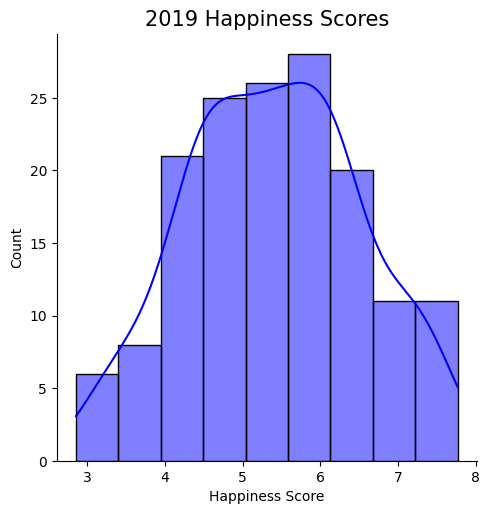

In [24]:
plt.figure(figsize = (8,6))
sns.displot(whr2019['Happiness Score'], kde=True, color='Blue')
plt.title('2019 Happiness Scores', fontsize=15)

<Axes: >

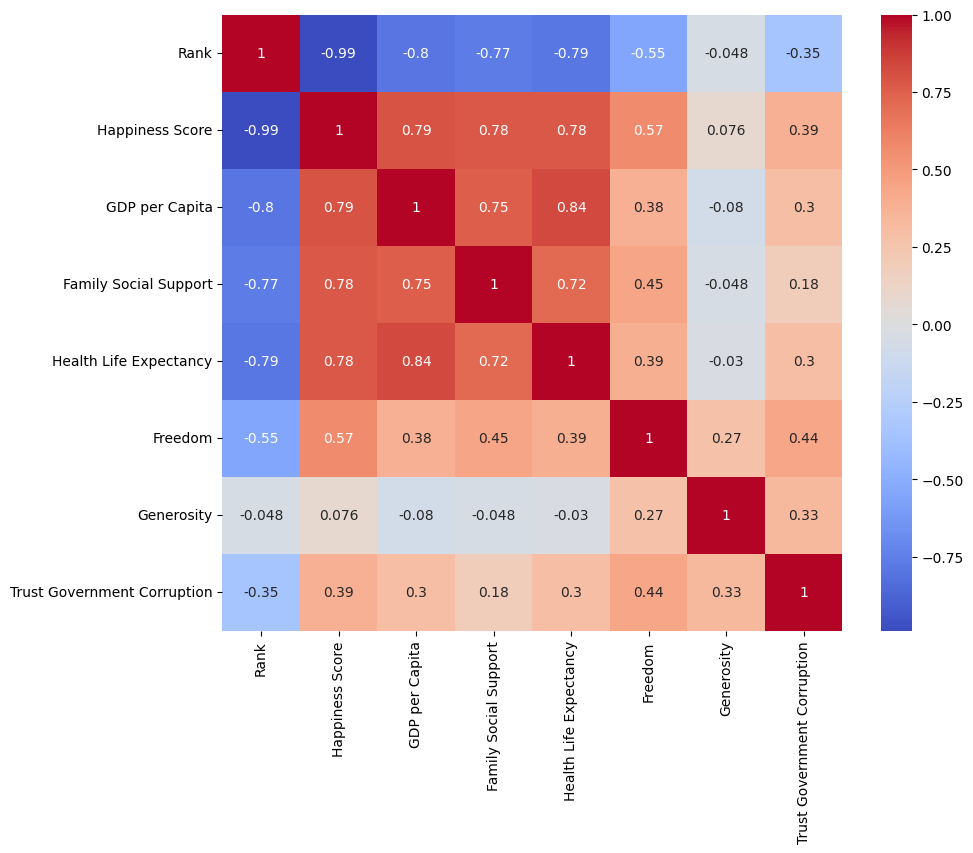

In [25]:
plt.figure(figsize=(10,8))

sns.heatmap(whr2019.drop(columns=['Country','Year']).corr(), cmap='coolwarm', annot=True)

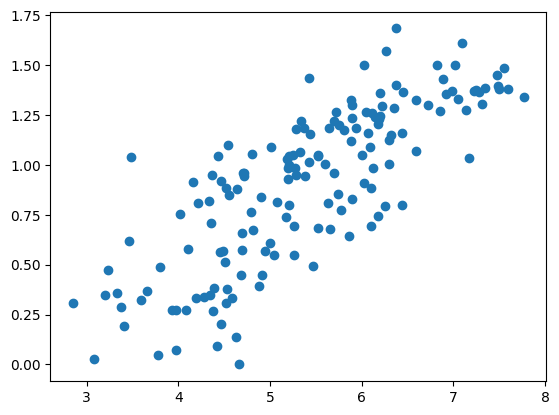

In [26]:
plt.scatter(whr2019['Happiness Score'], whr2019['GDP per Capita'])

In [27]:
#whr_merged_sliced.to_csv('whrmerged.csv')

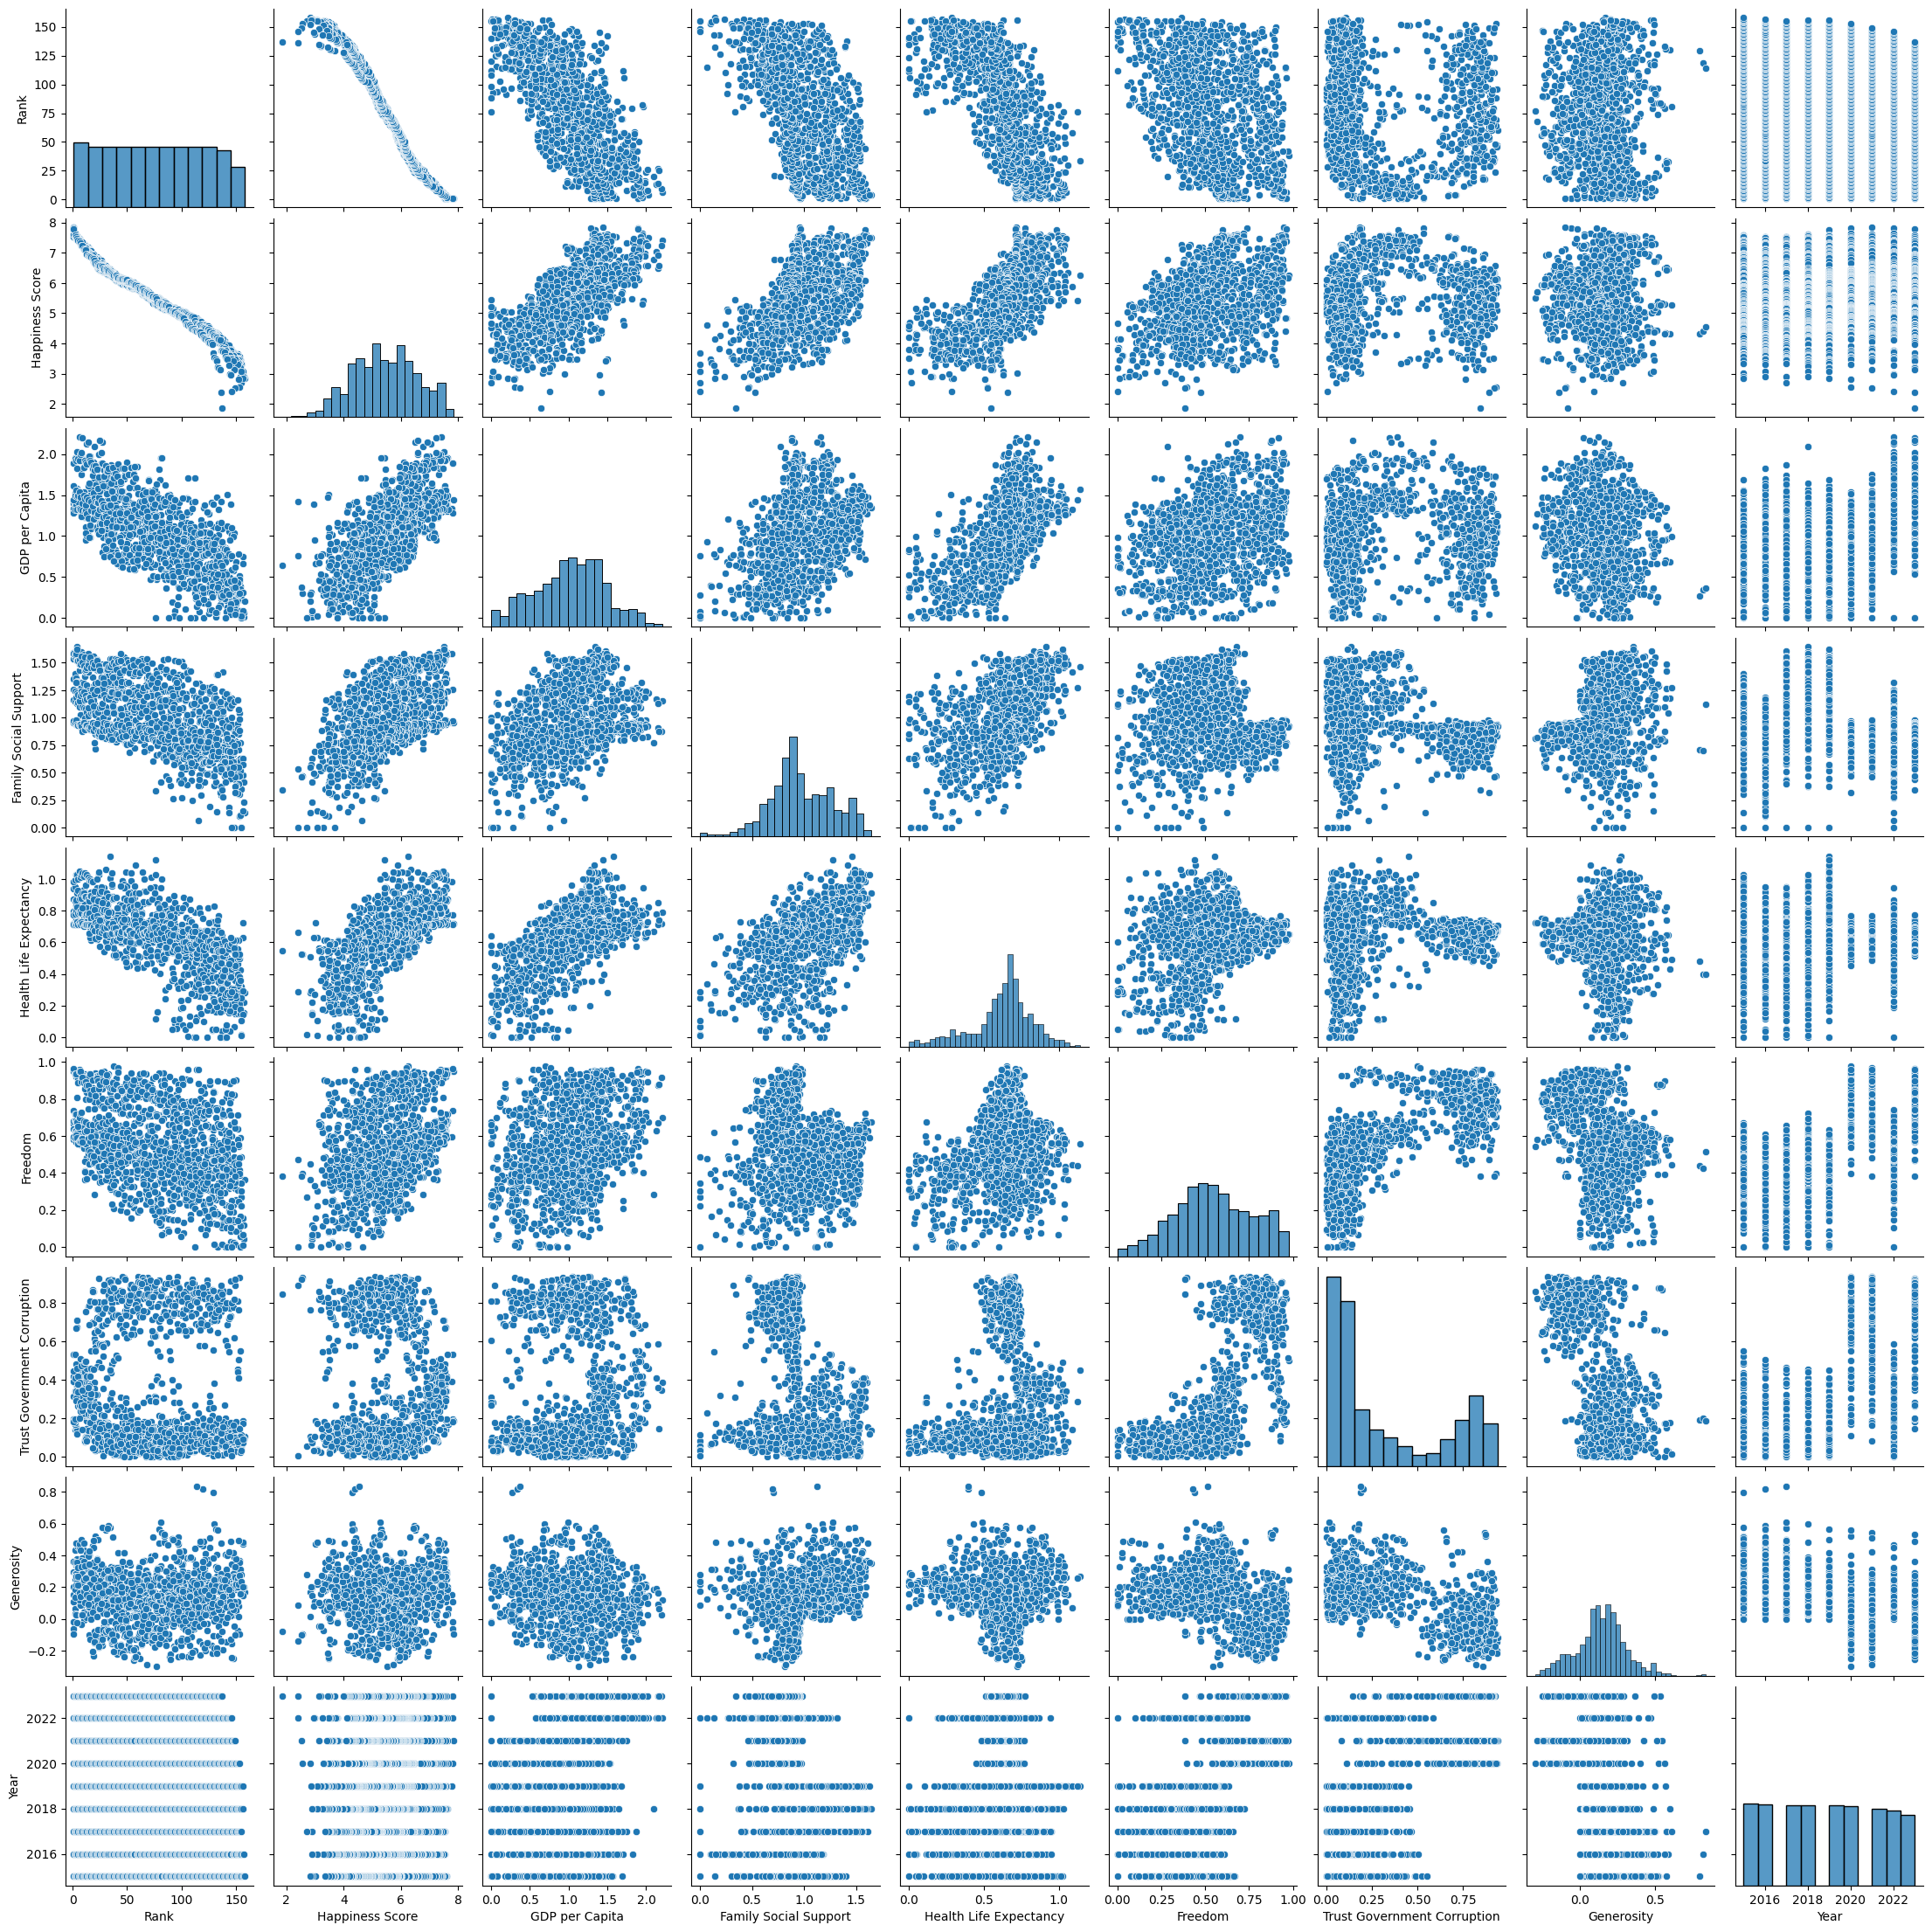

In [28]:
sns.pairplot(whr_merged_sliced)

<Figure size 1200x900 with 0 Axes>

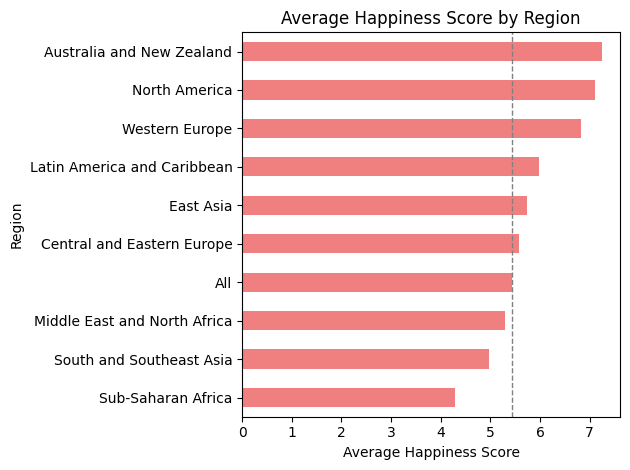

In [29]:
# Calculate mean happiness scores by region with groupby
mean_happiness_by_region = whr_merged_sliced.groupby('Region')['Happiness Score'].mean().sort_values()

# Adding the overall mean happiness score across all regions
overall_mean_happiness = whr_merged_sliced['Happiness Score'].mean()
mean_happiness_by_region['All'] = overall_mean_happiness

# Convert the series to a DataFrame to make it compatible with pivot_table method if needed later
mean_happiness_df = mean_happiness_by_region.reset_index()
mean_happiness_df.rename(columns={'Happiness Score': 'Average Happiness Score'}, inplace=True)
pivot_table = mean_happiness_df.pivot_table(index='Region', values='Average Happiness Score', aggfunc='mean').sort_values(by='Average Happiness Score')
plt.figure(figsize=(12,9))
pivot_table.loc[pivot_table.index].plot(kind='barh', color='lightcoral', legend=None)
plt.axvline(x=overall_mean_happiness, color='grey', linestyle='--', linewidth=1)

plt.xlabel('Average Happiness Score')
plt.ylabel('Region')
plt.title('Average Happiness Score by Region')
plt.tight_layout()  
plt.show()

In [30]:
#whr_merged_sliced[whr_merged_sliced['Region']=='Western Europe']['Country'].unique()

####so for years 2020,2021,2022 these were labelled as commonwealth of independent states but in the other years they were central and eastern europe
commonwealth_indep_states= ['Uzbekistan', 'Kazakhstan', 'Moldova', 'Tajikistan', 'Russia',
       'Kyrgyzstan', 'Belarus', 'Azerbaijan', 'Turkmenistan', 'Armenia',
       'Georgia', 'Ukraine']
whr_merged_sliced[whr_merged_sliced['Country'].isin(commonwealth_indep_states)]['Region'].unique()

whr_merged_sliced.head()

Country          Region  Rank  Happiness Score  GDP per Capita  \
0  Switzerland  Western Europe   1.0            7.587         1.39651   
1      Iceland  Western Europe   2.0            7.561         1.30232   
2      Denmark  Western Europe   3.0            7.527         1.32548   
3       Norway  Western Europe   4.0            7.522         1.45900   
4       Canada   North America   5.0            7.427         1.32629   

   Family Social Support  Health Life Expectancy  Freedom  \
0                1.34951                 0.94143  0.66557   
1                1.40223                 0.94784  0.62877   
2                1.36058                 0.87464  0.64938   
3                1.33095                 0.88521  0.66973   
4                1.32261                 0.90563  0.63297   

   Trust Government Corruption  Generosity  Year  
0                      0.41978     0.29678  2015  
1                      0.14145     0.43630  2015  
2                      0.48357     0.34139  2015  
3                      0.36503     0.34699  2015  
4                      0.32957     0.45811  2015

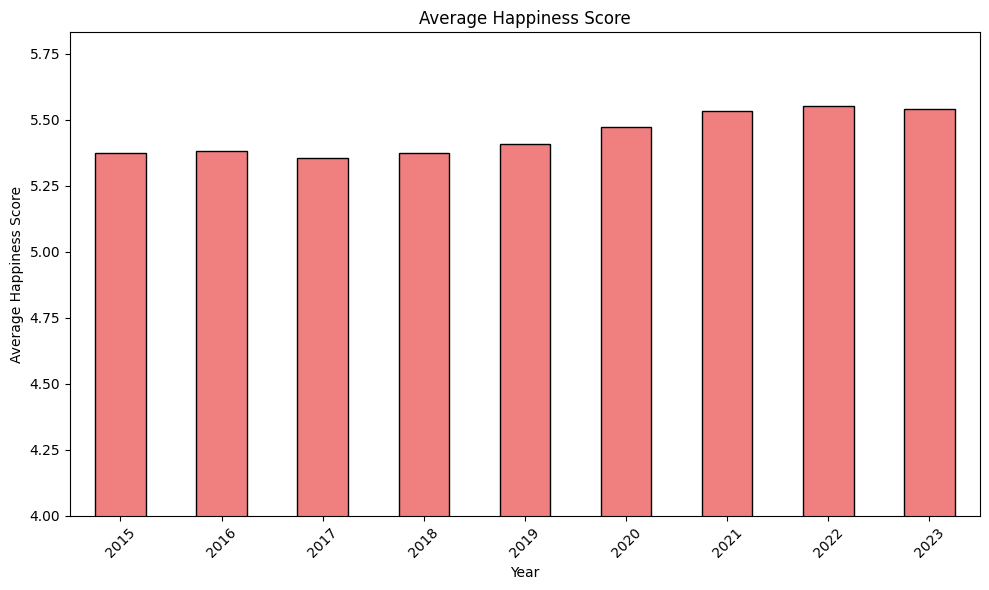

In [31]:
# Calculate the mean happiness scores by year
mean_happiness_by_year = whr_merged_sliced.groupby('Year')['Happiness Score'].mean()

plt.figure(figsize=(10,6))
mean_happiness_by_year.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score')
plt.ylim(4, None)  # Setting the y-axis to start at 4
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

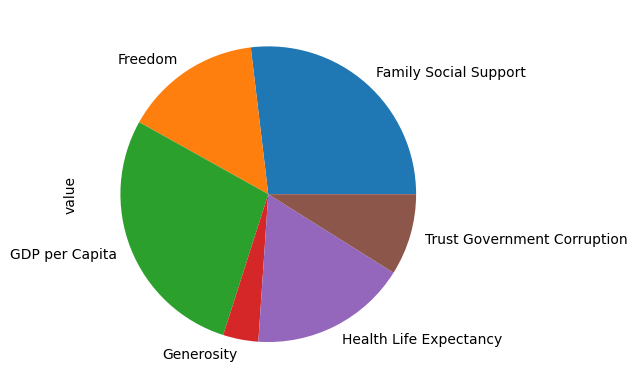

In [32]:
melt = pd.melt(whr_merged_sliced, id_vars = ['Country', 'Region', 'Rank', 'Happiness Score'], value_vars= ['GDP per Capita', 'Family Social Support', 'Health Life Expectancy', 'Freedom', 'Trust Government Corruption', 'Generosity'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

pv_melt = melt.pivot_table(index = 'variable', values = 'value')

pv_melt.plot(kind = 'pie', y='value', legend=False)

plt.show()

<Figure size 800x600 with 0 Axes>

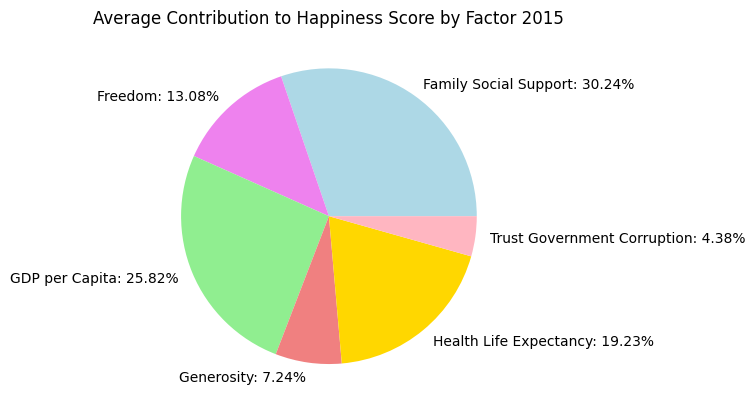

<Figure size 800x600 with 0 Axes>

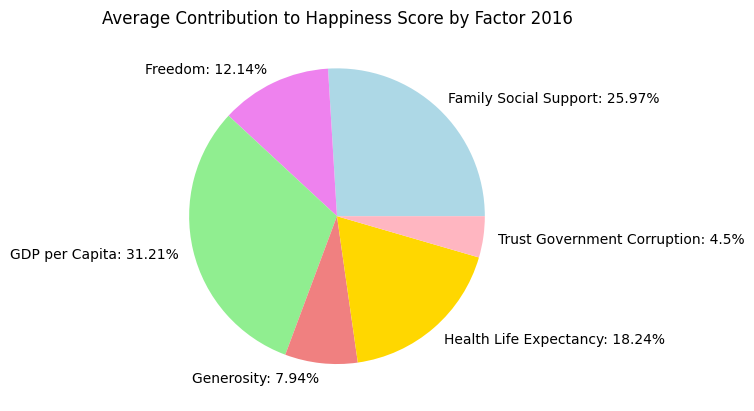

<Figure size 800x600 with 0 Axes>

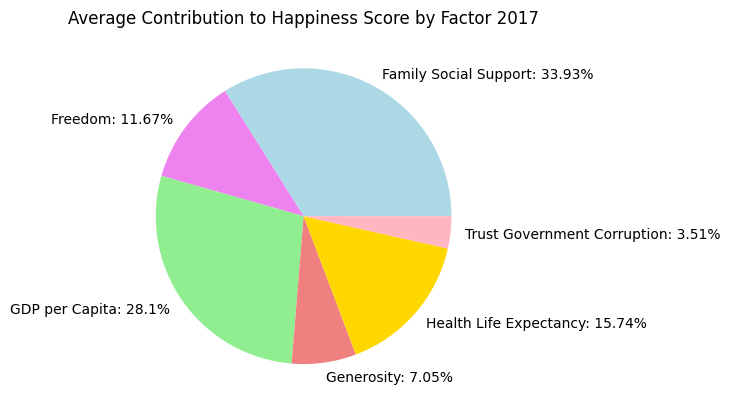

<Figure size 800x600 with 0 Axes>

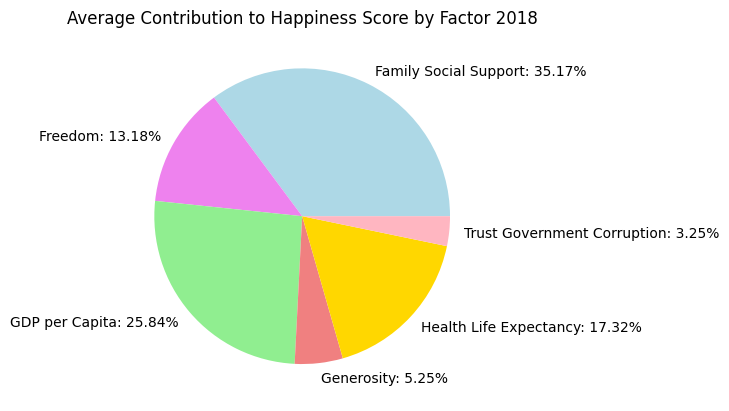

<Figure size 800x600 with 0 Axes>

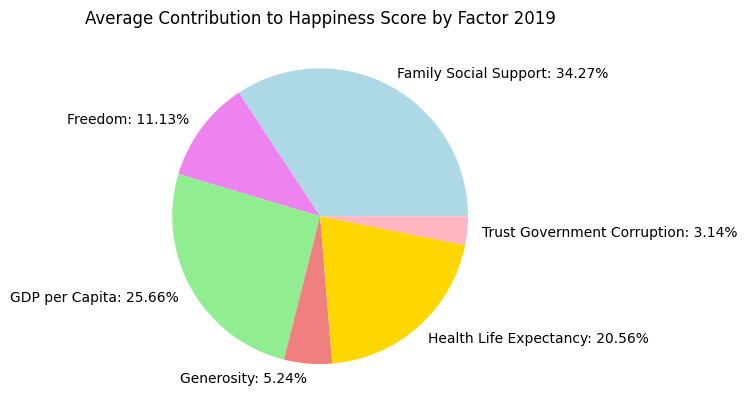

<Figure size 800x600 with 0 Axes>

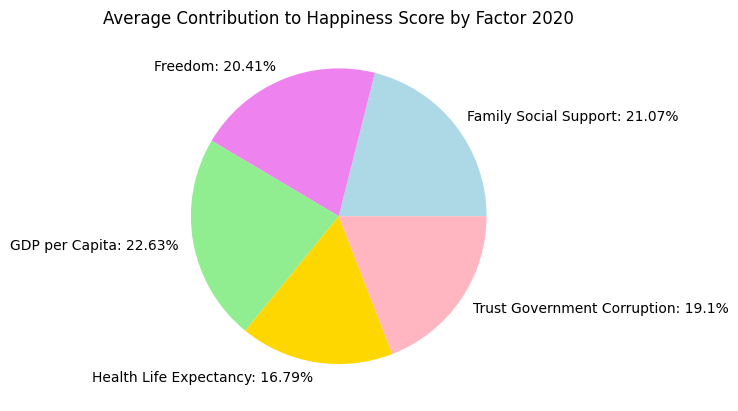

<Figure size 800x600 with 0 Axes>

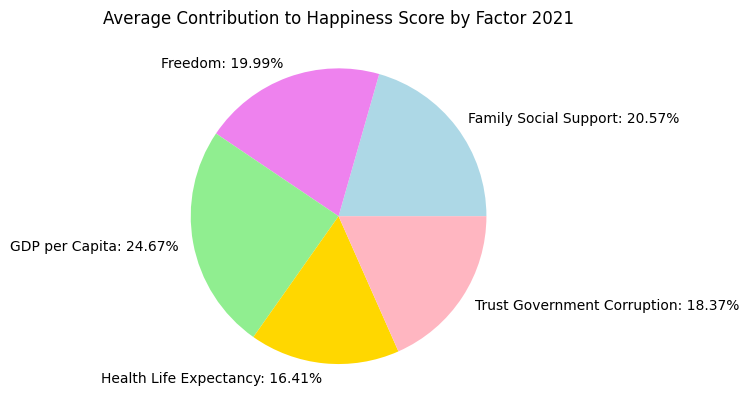

<Figure size 800x600 with 0 Axes>

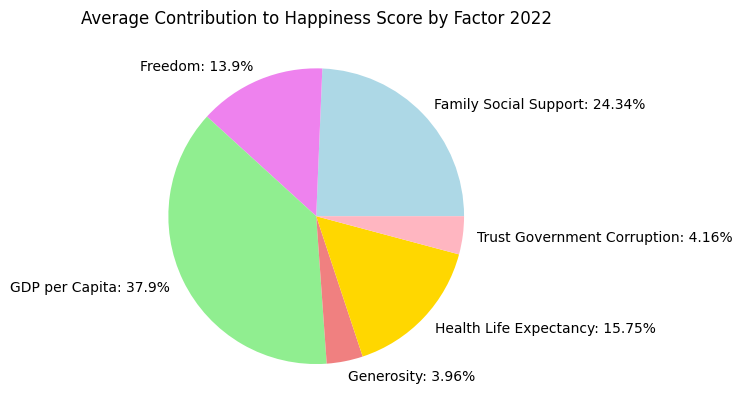

<Figure size 800x600 with 0 Axes>

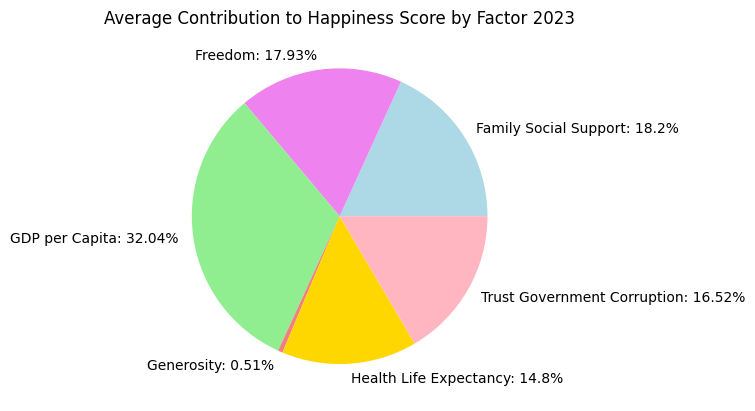

In [33]:
#fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), constrained_layout=True)

for year in range(2015,2024):
    try:
        melt = pd.melt(whr_merged_sliced[whr_merged_sliced['Year']==year], id_vars = ['Country', 'Region', 'Rank', 'Happiness Score'], value_vars= ['GDP per Capita', 'Family Social Support', 'Health Life Expectancy', 'Freedom', 'Trust Government Corruption', 'Generosity'])
        melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)
        pv_melt = melt.pivot_table(index='variable', values='value', aggfunc='mean')#agg function is mean by default should state it because this analysis is getting complicated

        #wow it appears that people were not generous during 2020 and 2021...this could be a data issue or sampling error but it also intuitively makes sense...however I don't wish to believe it
        #it appears generosity was negative somehow
        #I'll manually set it to 0 to be able to make a pie chart
        if pv_melt['value']['Generosity']<0:
           pv_melt.loc['Generosity', 'value']=0
        
        # Calculating percentages for the pie chart labels
        total = pv_melt['value'].sum()
        pv_melt['percentage'] = (pv_melt['value'] / total * 100).round(2) #interesting so the sum is equal to the happiness score??????

        #print(year)
        #print(pv_melt['value'])
        # Plotting the pie chart with each slice in different colors
        
        colors = ['lightblue', 'violet','lightgreen', 'lightcoral', 'gold', 'lightpink']
        
        plt.figure(figsize=(8, 6))
        
        pv_melt.plot(kind='pie', y='value', legend=False, 
        
                     labels=[f'{index}: {perc}%' for index, perc in pv_melt['percentage'].items()], colors=colors)
        
        plt.ylabel('')  # Remove the y-label as it's unnecessary for pie charts
        
        plt.title(f'Average Contribution to Happiness Score by Factor {year}')

        #plt.savefig(f'pie{year}.jpg')
        plt.show()
        
    except:
        pass

<Figure size 800x600 with 0 Axes>

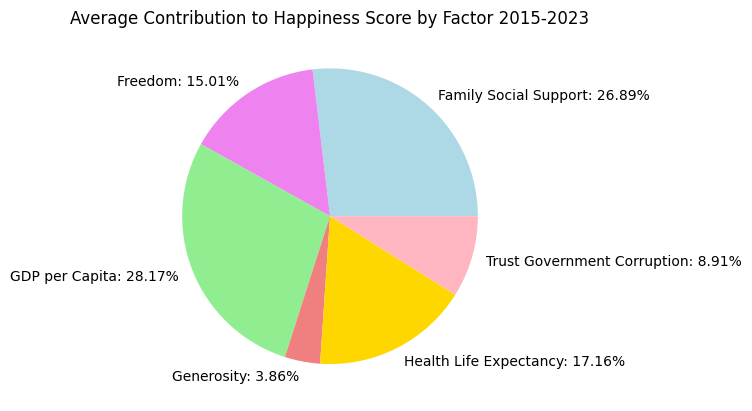

In [34]:
melt = pd.melt(whr_merged_sliced, id_vars = ['Country', 'Region', 'Rank', 'Happiness Score'], value_vars= ['GDP per Capita', 'Family Social Support', 'Health Life Expectancy', 'Freedom', 'Trust Government Corruption', 'Generosity'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)
pv_melt = melt.pivot_table(index='variable', values='value', aggfunc='mean')#agg function is mean by default should state it because this analysis is getting complicated

#wow it appears that people were not generous during 2020 and 2021...this could be a data issue or sampling error but it also intuitively makes sense...however I don't wish to believe it
#it appears generosity was negative somehow
#I'll manually set it to 0 to be able to make a pie chart
if pv_melt['value']['Generosity']<0:
   pv_melt.loc['Generosity', 'value']=0

# Calculating percentages for the pie chart labels
total = pv_melt['value'].sum()
pv_melt['percentage'] = (pv_melt['value'] / total * 100).round(2) #interesting so the sum is equal to the happiness score??????

#print(year)
#print(pv_melt['value'])
# Plotting the pie chart with each slice in different colors

colors = ['lightblue', 'violet','lightgreen', 'lightcoral', 'gold', 'lightpink']

plt.figure(figsize=(8, 6))

pv_melt.plot(kind='pie', y='value', legend=False, 

             labels=[f'{index}: {perc}%' for index, perc in pv_melt['percentage'].items()], colors=colors)

plt.ylabel('')  # Remove the y-label as it's unnecessary for pie charts

plt.title('Average Contribution to Happiness Score by Factor 2015-2023')

plt.show()

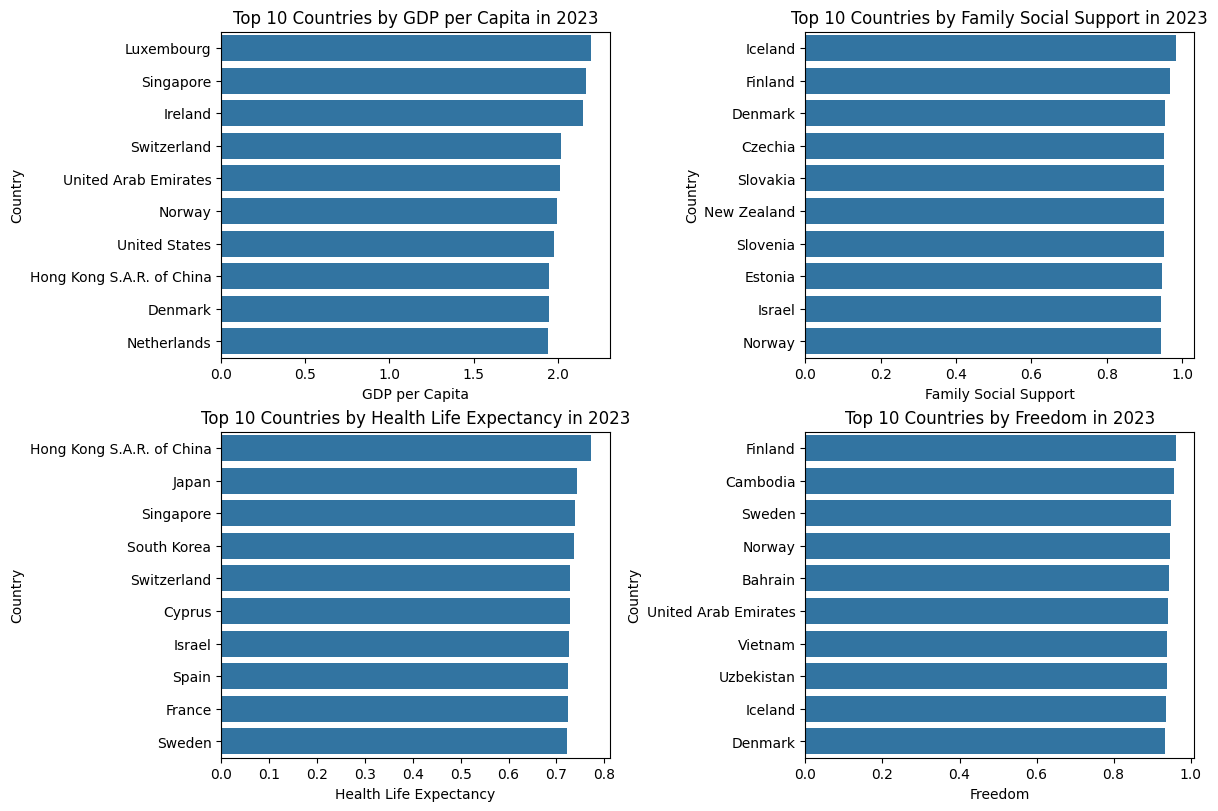

In [35]:
#this may not make sense because we have to select a single year but it is useful so lets include it because how else would be delve into top 10 countries for factors?

fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

sns.barplot(x='GDP per Capita', y='Country', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].nlargest(10, 'GDP per Capita'), ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Countries by GDP per Capita in 2023')

sns.barplot(x='Family Social Support', y='Country', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].nlargest(10, 'Family Social Support'), ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Countries by Family Social Support in 2023')

sns.barplot(x='Health Life Expectancy', y='Country', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].nlargest(10, 'Health Life Expectancy'), ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Countries by Health Life Expectancy in 2023')

sns.barplot(x='Freedom', y='Country', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].nlargest(10, 'Freedom'), ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Countries by Freedom in 2023')

plt.show()

In [36]:
whr_merged_sliced[whr_merged_sliced['Year']==2023].nlargest(10,'GDP per Capita')

Country                        Region  Rank  \
1238                 Luxembourg                Western Europe   9.0   
1254                  Singapore      South and Southeast Asia  25.0   
1243                    Ireland                Western Europe  14.0   
1237                Switzerland                Western Europe   8.0   
1255       United Arab Emirates  Middle East and North Africa  26.0   
1236                     Norway                Western Europe   7.0   
1244              United States                 North America  15.0   
1311  Hong Kong S.A.R. of China                     East Asia  82.0   
1231                    Denmark                Western Europe   2.0   
1234                Netherlands                Western Europe   5.0   

      Happiness Score  GDP per Capita  Family Social Support  \
1238            7.228           2.200                  0.879   
1254            6.587           2.168                  0.878   
1243            6.911           2.152                  0.905   
1237            7.240           2.022                  0.920   
1255            6.571           2.015                  0.826   
1236            7.315           1.994                  0.943   
1244            6.894           1.980                  0.919   
1311            5.308           1.951                  0.817   
1231            7.586           1.949                  0.954   
1234            7.403           1.942                  0.930   

      Health Life Expectancy  Freedom  Trust Government Corruption  \
1238                 0.71675    0.915                        0.345   
1254                 0.73800    0.878                        0.146   
1243                 0.71300    0.874                        0.358   
1237                 0.72900    0.891                        0.266   
1255                 0.66243    0.942                        0.584   
1236                 0.71500    0.947                        0.283   
1244                 0.65850    0.800                        0.689   
1311                 0.77280    0.687                        0.385   
1231                 0.71250    0.934                        0.196   
1234                 0.71550    0.887                        0.379   

      Generosity  Year  
1238       0.024  2023  
1254       0.063  2023  
1243       0.092  2023  
1237       0.027  2023  
1255       0.096  2023  
1236       0.141  2023  
1244       0.137  2023  
1311      -0.026  2023  
1231       0.134  2023  
1234       0.213  2023

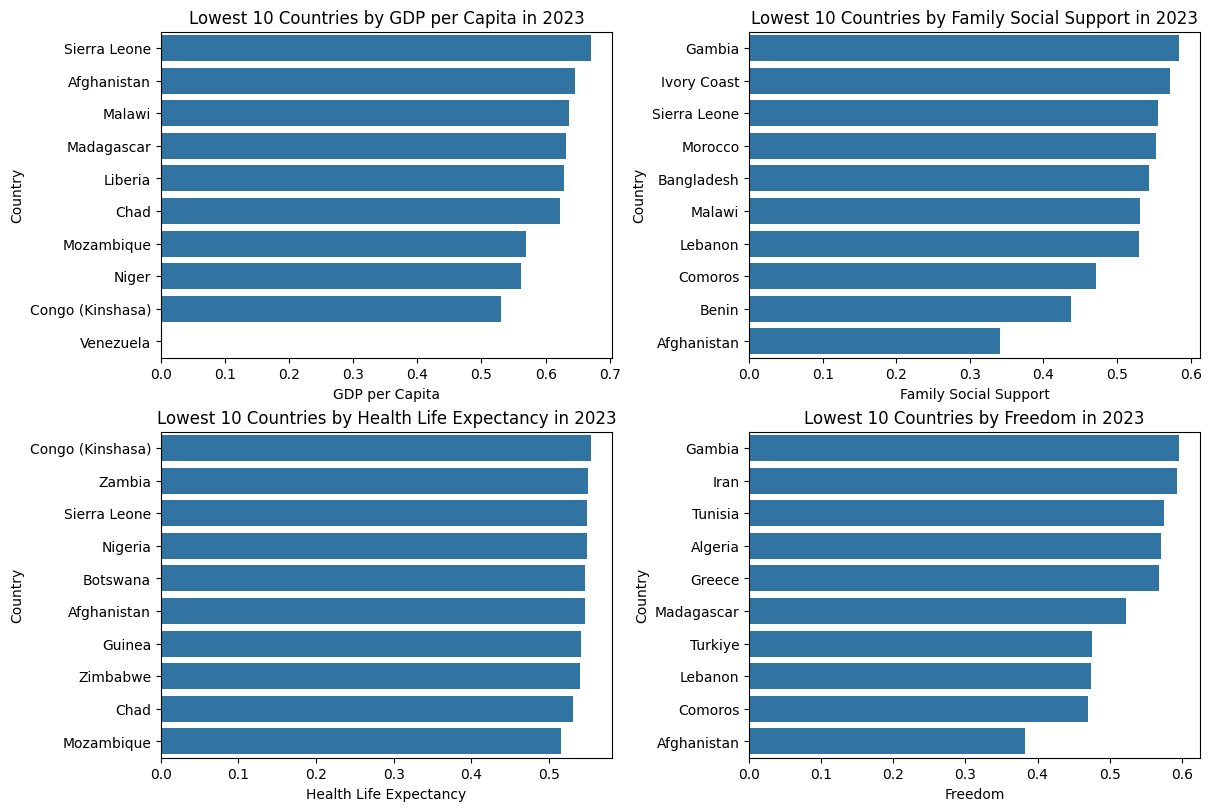

In [37]:


fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

sns.barplot(x='GDP per Capita', y='Country', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].nsmallest(10, 'GDP per Capita').iloc[::-1], ax=axes[0, 0])
axes[0, 0].set_title('Lowest 10 Countries by GDP per Capita in 2023')


sns.barplot(x='Family Social Support', y='Country', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].nsmallest(10, 'Family Social Support').iloc[::-1], ax=axes[0, 1])
axes[0, 1].set_title('Lowest 10 Countries by Family Social Support in 2023')


sns.barplot(x='Health Life Expectancy', y='Country', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].nsmallest(10, 'Health Life Expectancy').iloc[::-1], ax=axes[1, 0])
axes[1, 0].set_title('Lowest 10 Countries by Health Life Expectancy in 2023')


sns.barplot(x='Freedom', y='Country', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].nsmallest(10, 'Freedom').iloc[::-1], ax=axes[1, 1])
axes[1, 1].set_title('Lowest 10 Countries by Freedom in 2023')

plt.show()


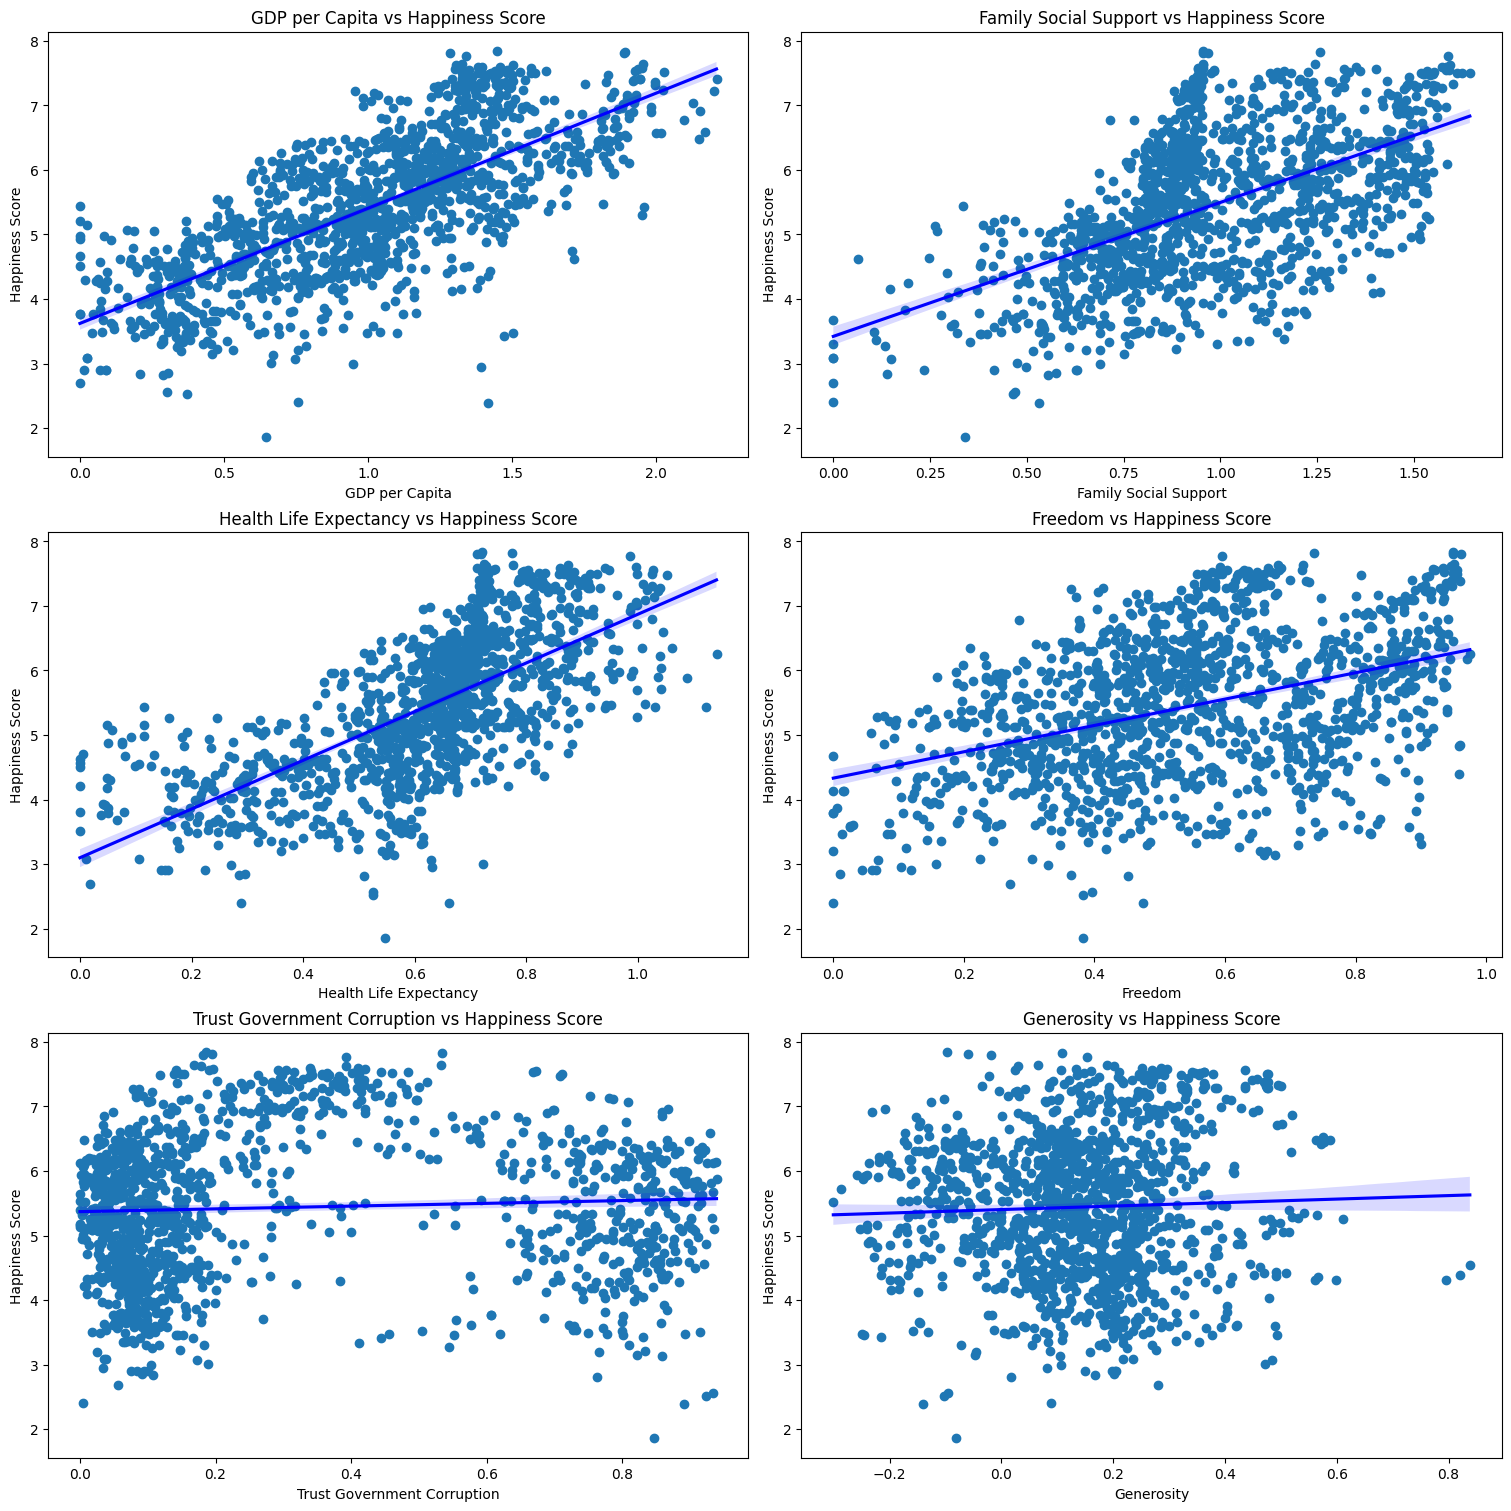

Variable  Correlation with Happiness Score
0               GDP per Capita                          0.723810
1        Family Social Support                          0.559245
2       Health Life Expectancy                          0.677410
3                      Freedom                          0.404185
4  Trust Government Corruption                          0.059454
5                   Generosity                          0.039402

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), constrained_layout=True)

# List of variables for the x-axis

variables = ['GDP per Capita', 'Family Social Support', 'Health Life Expectancy', 'Freedom', 'Trust Government Corruption', 'Generosity']


correlations = {}

for i, var in enumerate(variables):
    # Determine the position of the current plot
    row = i // 2
    col = i % 2

    # Create scatter plot with a regression line
    sns.regplot(x=var, y='Happiness Score', data=whr_merged_sliced, ax=axes[row, col], scatter_kws={'alpha':1}, line_kws={'color':'blue'})

    axes[row, col].set_title(f'{var} vs Happiness Score')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Happiness Score')

    # Calculate and store the correlation value
    correlations[var] = whr_merged_sliced[var].corr(whr_merged_sliced['Happiness Score'])


plt.show()
correlation_table = pd.DataFrame(list(correlations.items()), columns=['Variable', 'Correlation with Happiness Score'])
correlation_table

/var/folders/kd/sys88dj522s2xrww72wp0yqr0000gn/T/ipykernel_30435/180361664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation with Happiness Score', y='Variable', data=correlation_table.sort_values('Correlation with Happiness Score', ascending=False), palette='coolwarm_r')


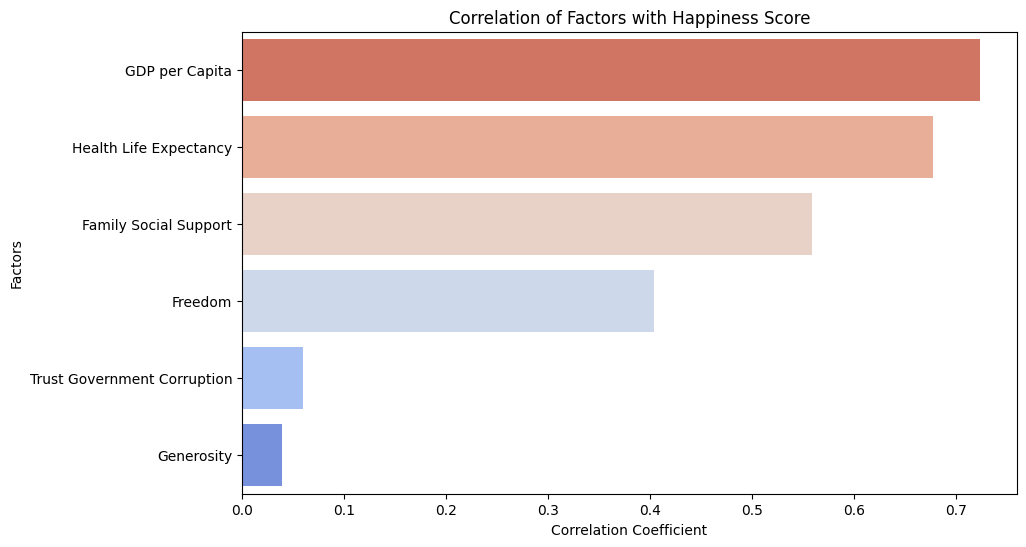

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation with Happiness Score', y='Variable', data=correlation_table.sort_values('Correlation with Happiness Score', ascending=False), palette='coolwarm_r')
plt.title('Correlation of Factors with Happiness Score')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Factors')
plt.show()

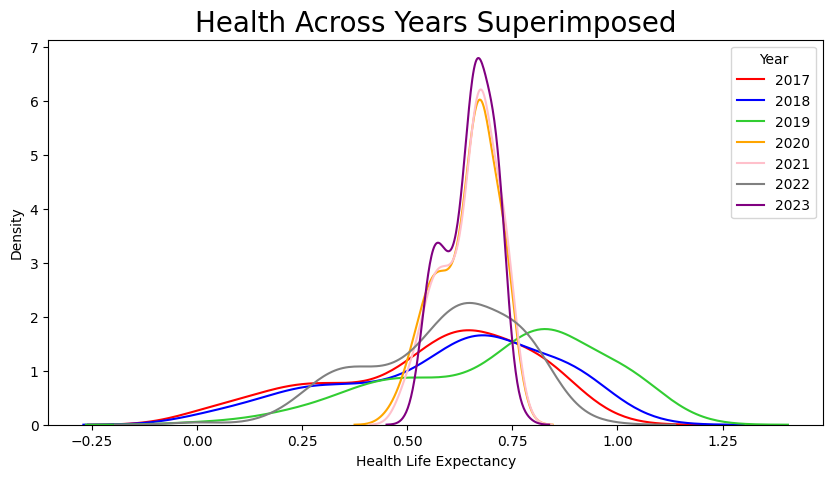

In [40]:
plt.figure(figsize=(10,5))
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2017]['Health Life Expectancy'],color='red', label='2017')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2018]['Health Life Expectancy'],color='blue', label='2018')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2019]['Health Life Expectancy'],color='limegreen', label='2019')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2020]['Health Life Expectancy'],color='orange', label='2020')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2021]['Health Life Expectancy'],color='pink', label='2021')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2022]['Health Life Expectancy'],color='grey', label='2022')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2023]['Health Life Expectancy'],color='purple', label='2023')
plt.title('Health Across Years Superimposed',size=20)
plt.legend(title='Year')
plt.show()

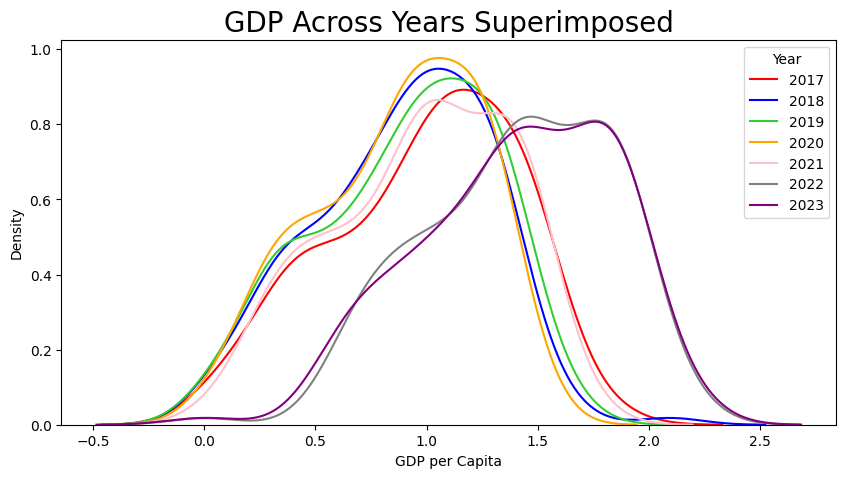

In [41]:
plt.figure(figsize=(10,5))
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2017]['GDP per Capita'],color='red', label='2017')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2018]['GDP per Capita'],color='blue', label='2018')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2019]['GDP per Capita'],color='limegreen', label='2019')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2020]['GDP per Capita'],color='orange', label='2020')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2021]['GDP per Capita'],color='pink', label='2021')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2022]['GDP per Capita'],color='grey', label='2022')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2023]['GDP per Capita'],color='purple', label='2023')
plt.title('GDP Across Years Superimposed',size=20)
plt.legend(title='Year')
plt.show()

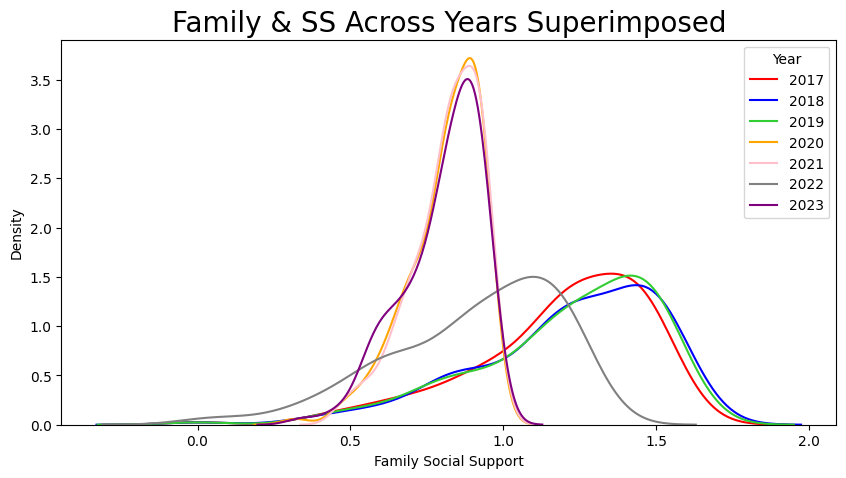

In [42]:
plt.figure(figsize=(10,5))
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2017]['Family Social Support'],color='red', label='2017')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2018]['Family Social Support'],color='blue', label='2018')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2019]['Family Social Support'],color='limegreen', label='2019')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2020]['Family Social Support'],color='orange', label='2020')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2021]['Family Social Support'],color='pink', label='2021')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2022]['Family Social Support'],color='grey', label='2022')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2023]['Family Social Support'],color='purple', label='2023')
plt.title('Family & SS Across Years Superimposed',size=20)
plt.legend(title='Year')
plt.show()

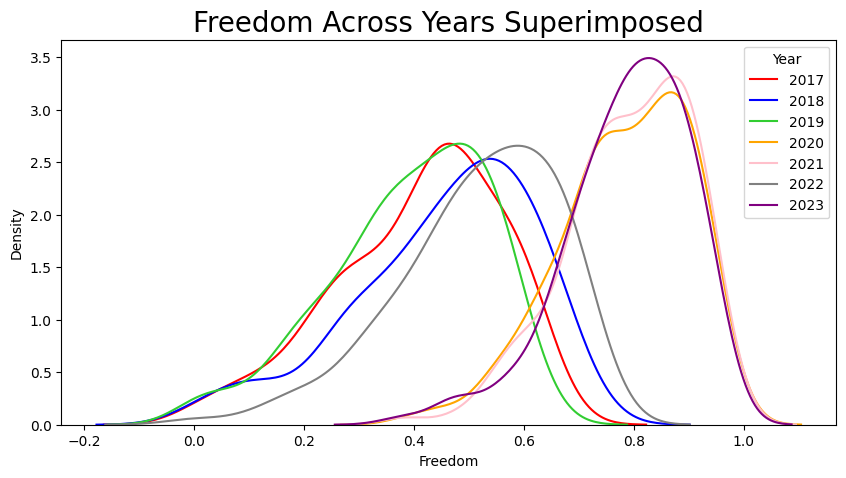

In [43]:
plt.figure(figsize=(10,5))
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2017]['Freedom'],color='red', label='2017')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2018]['Freedom'],color='blue', label='2018')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2019]['Freedom'],color='limegreen', label='2019')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2020]['Freedom'],color='orange', label='2020')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2021]['Freedom'],color='pink', label='2021')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2022]['Freedom'],color='grey', label='2022')
sns.kdeplot(whr_merged_sliced[whr_merged_sliced['Year']==2023]['Freedom'],color='purple', label='2023')
plt.title('Freedom Across Years Superimposed',size=20)
plt.legend(title='Year')
plt.show()

<Axes: >

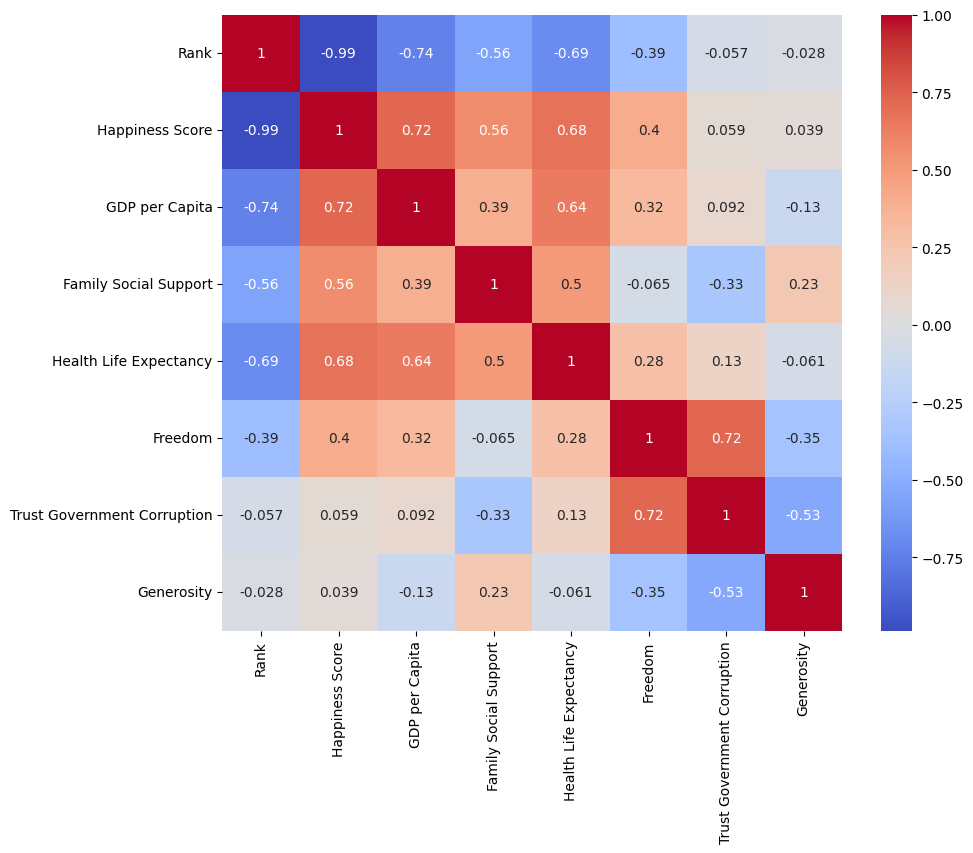

In [44]:
plt.figure(figsize=(10,8))

sns.heatmap(whr_merged_sliced.drop(columns=['Country','Region','Year']).corr(), cmap='coolwarm', annot=True)

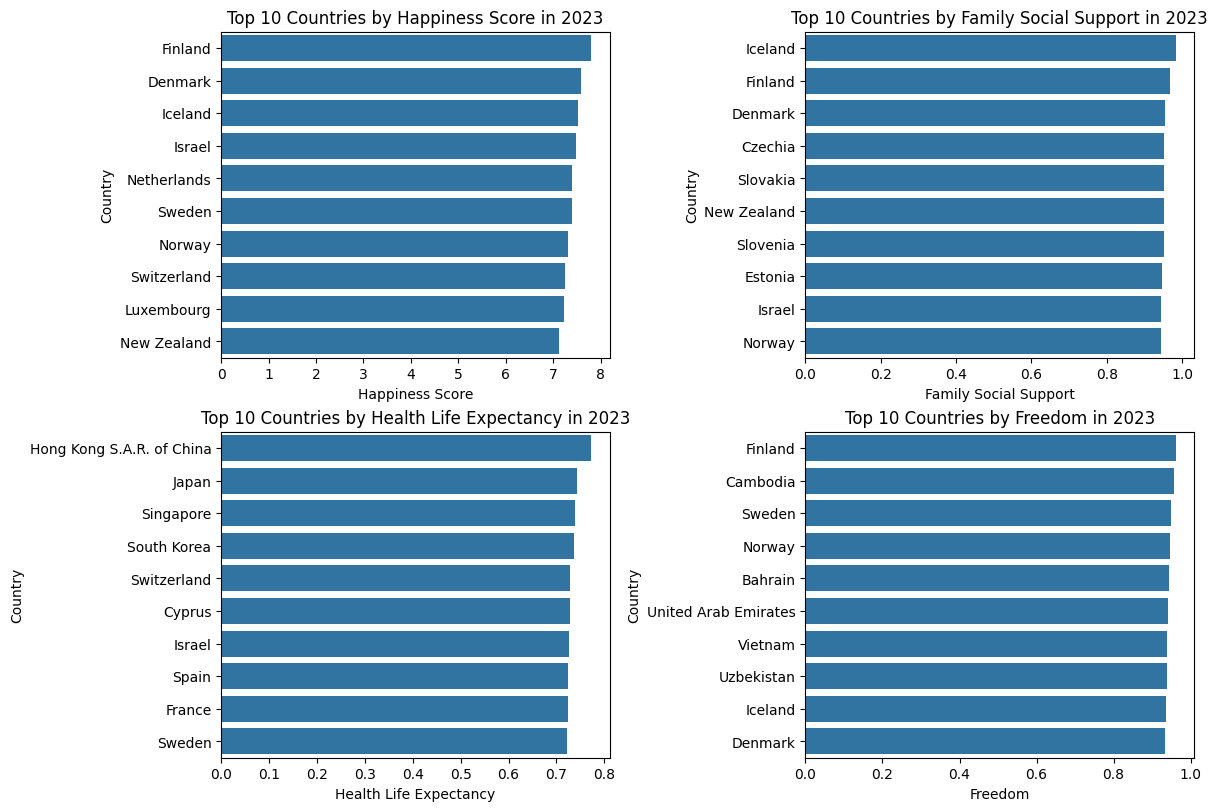

In [45]:
#this may not make sense because we have to select a single year but it is useful so lets include it because how else would be delve into top 10 countries for factors?

fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

sns.barplot(x='Happiness Score', y='Country', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].nlargest(10, 'Happiness Score'), ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Countries by Happiness Score in 2023')

sns.barplot(x='Family Social Support', y='Country', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].nlargest(10, 'Family Social Support'), ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Countries by Family Social Support in 2023')

sns.barplot(x='Health Life Expectancy', y='Country', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].nlargest(10, 'Health Life Expectancy'), ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Countries by Health Life Expectancy in 2023')

sns.barplot(x='Freedom', y='Country', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].nlargest(10, 'Freedom'), ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Countries by Freedom in 2023')

plt.show()

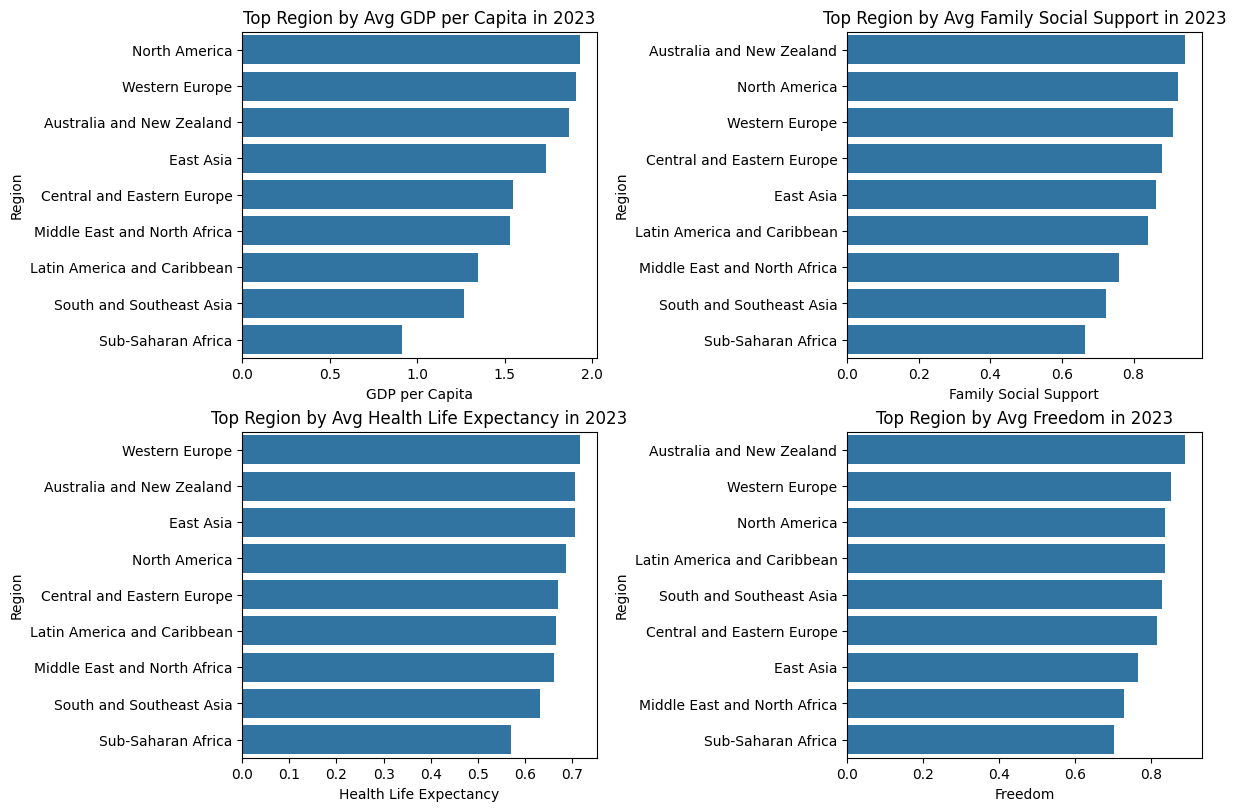

In [46]:
#this may not make sense because we have to select a single year but it is useful so lets include it because how else would be delve into top 10 countries for factors?

fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

sns.barplot(x='GDP per Capita', y='Region', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].groupby('Region')['GDP per Capita'].mean().reset_index().sort_values(by='GDP per Capita',ascending=False), ax=axes[0, 0])
axes[0, 0].set_title('Top Region by Avg GDP per Capita in 2023')

sns.barplot(x='Family Social Support', y='Region', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].groupby('Region')['Family Social Support'].mean().reset_index().sort_values(by='Family Social Support',ascending=False), ax=axes[0, 1])
axes[0, 1].set_title('Top Region by Avg Family Social Support in 2023')

sns.barplot(x='Health Life Expectancy', y='Region', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].groupby('Region')['Health Life Expectancy'].mean().reset_index().sort_values(by='Health Life Expectancy',ascending=False), ax=axes[1, 0])
axes[1, 0].set_title('Top Region by Avg Health Life Expectancy in 2023')

sns.barplot(x='Freedom', y='Region', data=whr_merged_sliced[whr_merged_sliced['Year'] == 2023].groupby('Region')['Freedom'].mean().reset_index().sort_values(by='Freedom',ascending=False), ax=axes[1, 1])
axes[1, 1].set_title('Top Region by Avg Freedom in 2023')

plt.show()

In [47]:
whr_merged_sliced[whr_merged_sliced['Year'] == 2023].groupby('Region')['Freedom'].mean().reset_index().sort_values(by='Freedom',ascending=False)

Region   Freedom
0     Australia and New Zealand  0.888500
8                Western Europe  0.853150
5                 North America  0.837000
3   Latin America and Caribbean  0.836895
6      South and Southeast Asia  0.828800
1    Central and Eastern Europe  0.816440
2                     East Asia  0.765000
4  Middle East and North Africa  0.728167
7            Sub-Saharan Africa  0.703485

/var/folders/kd/sys88dj522s2xrww72wp0yqr0000gn/T/ipykernel_30435/2931110078.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


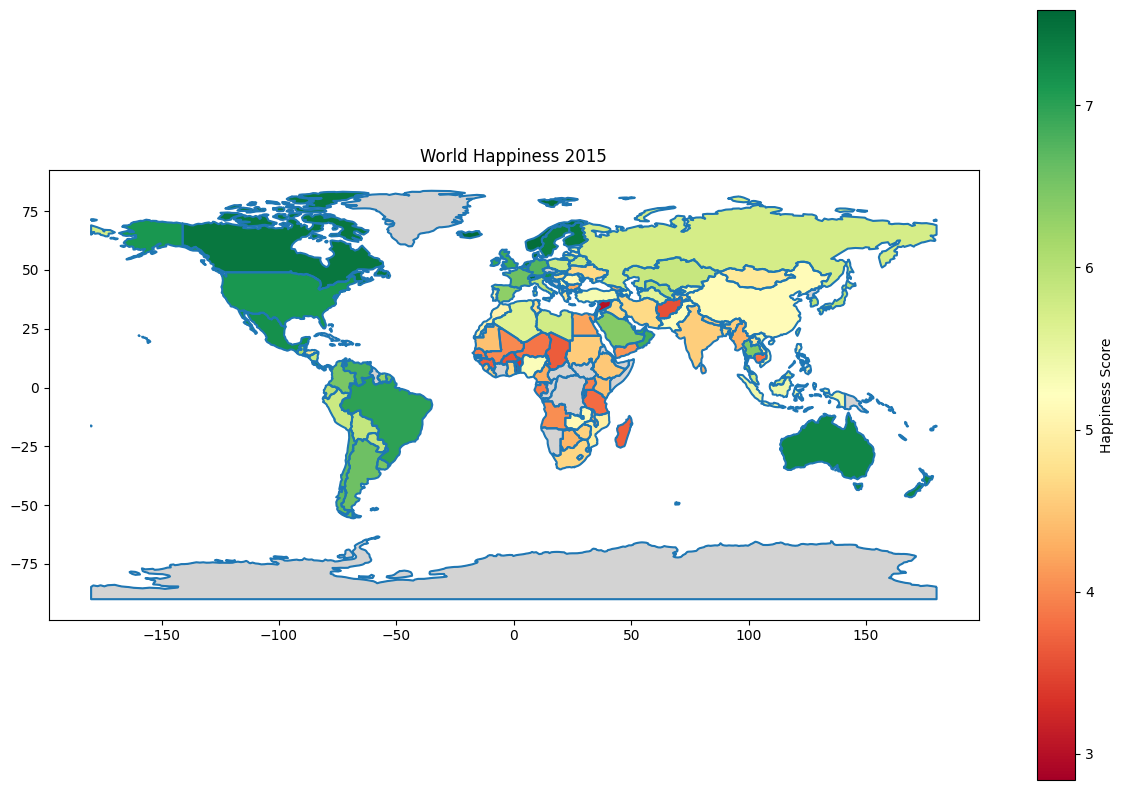

/var/folders/kd/sys88dj522s2xrww72wp0yqr0000gn/T/ipykernel_30435/2931110078.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


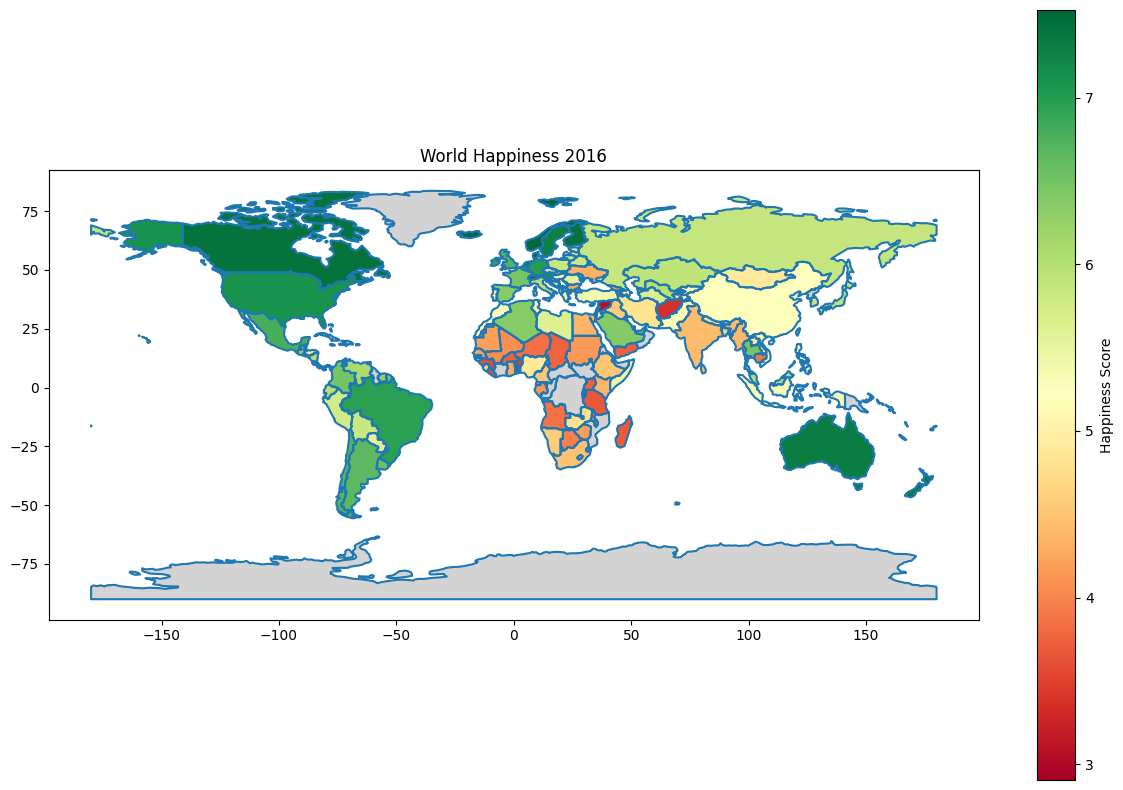

/var/folders/kd/sys88dj522s2xrww72wp0yqr0000gn/T/ipykernel_30435/2931110078.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


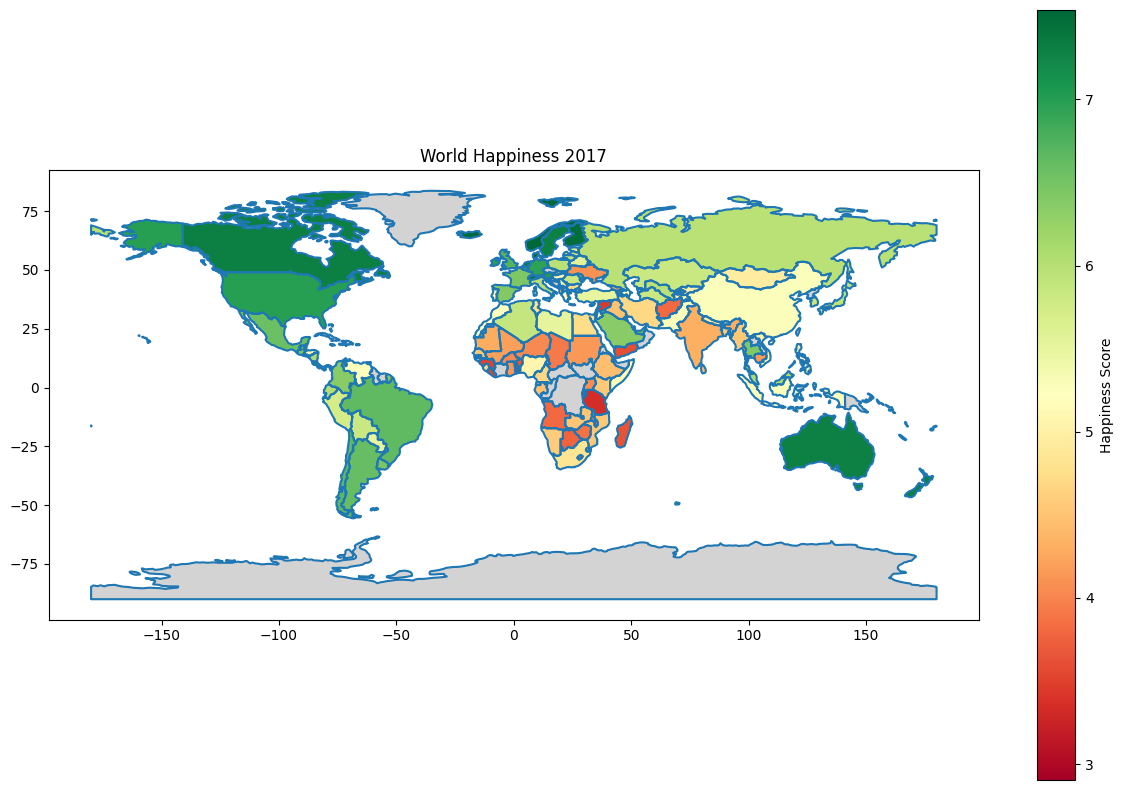

/var/folders/kd/sys88dj522s2xrww72wp0yqr0000gn/T/ipykernel_30435/2931110078.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


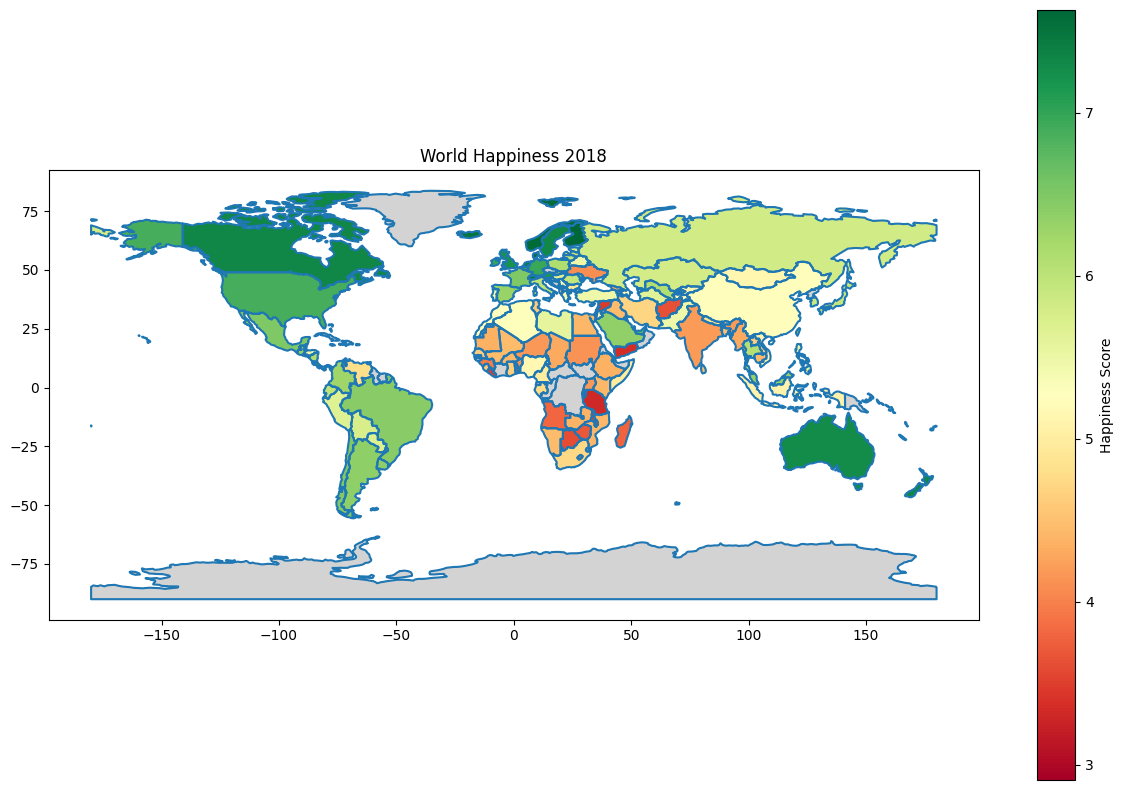

/var/folders/kd/sys88dj522s2xrww72wp0yqr0000gn/T/ipykernel_30435/2931110078.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


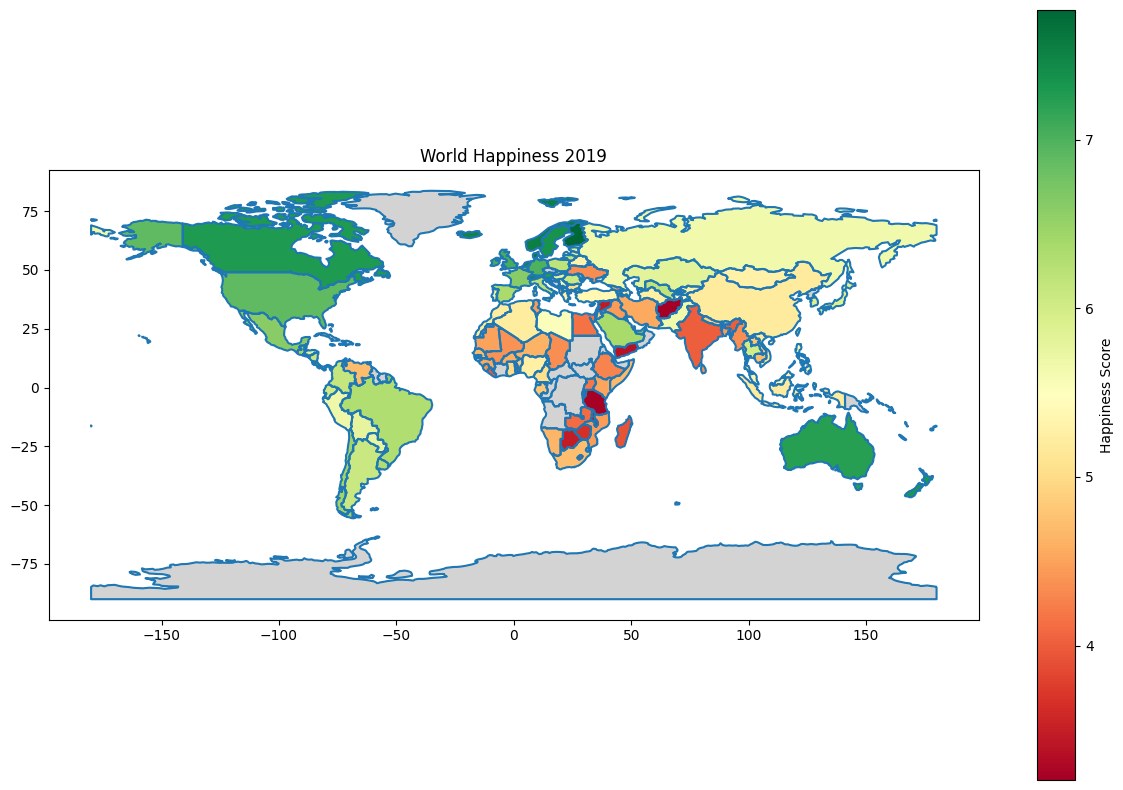

/var/folders/kd/sys88dj522s2xrww72wp0yqr0000gn/T/ipykernel_30435/2931110078.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


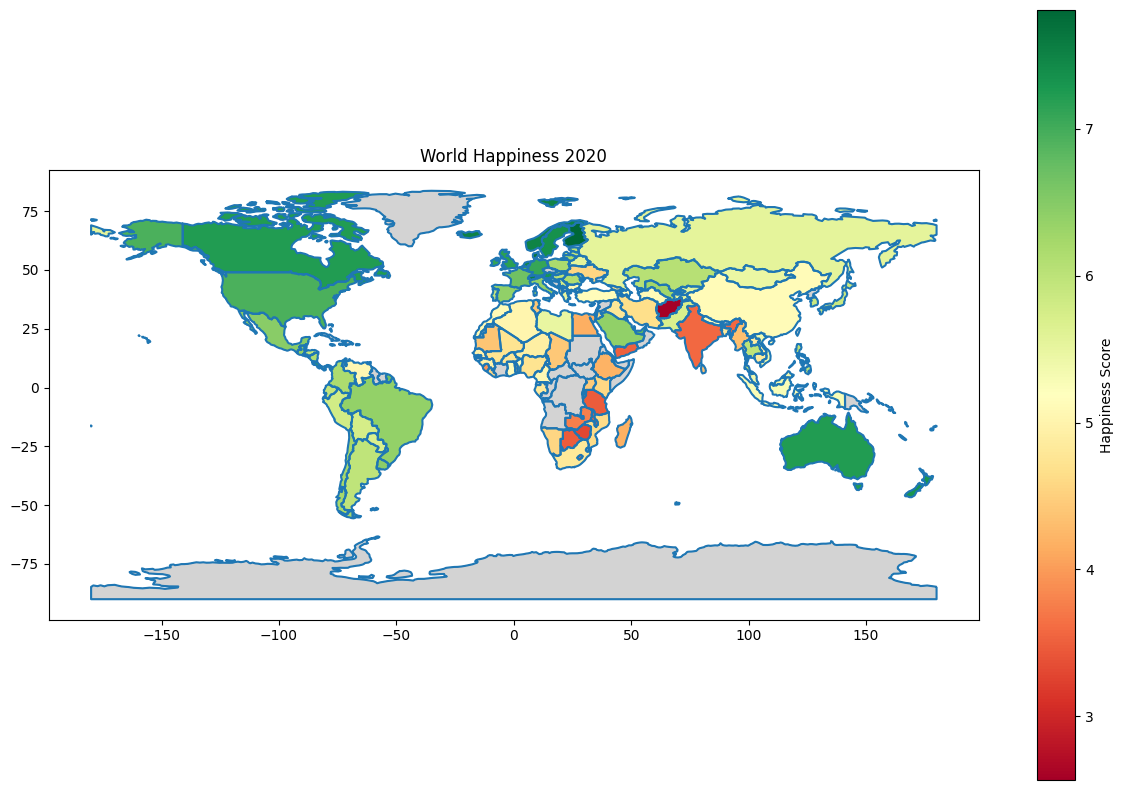

/var/folders/kd/sys88dj522s2xrww72wp0yqr0000gn/T/ipykernel_30435/2931110078.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


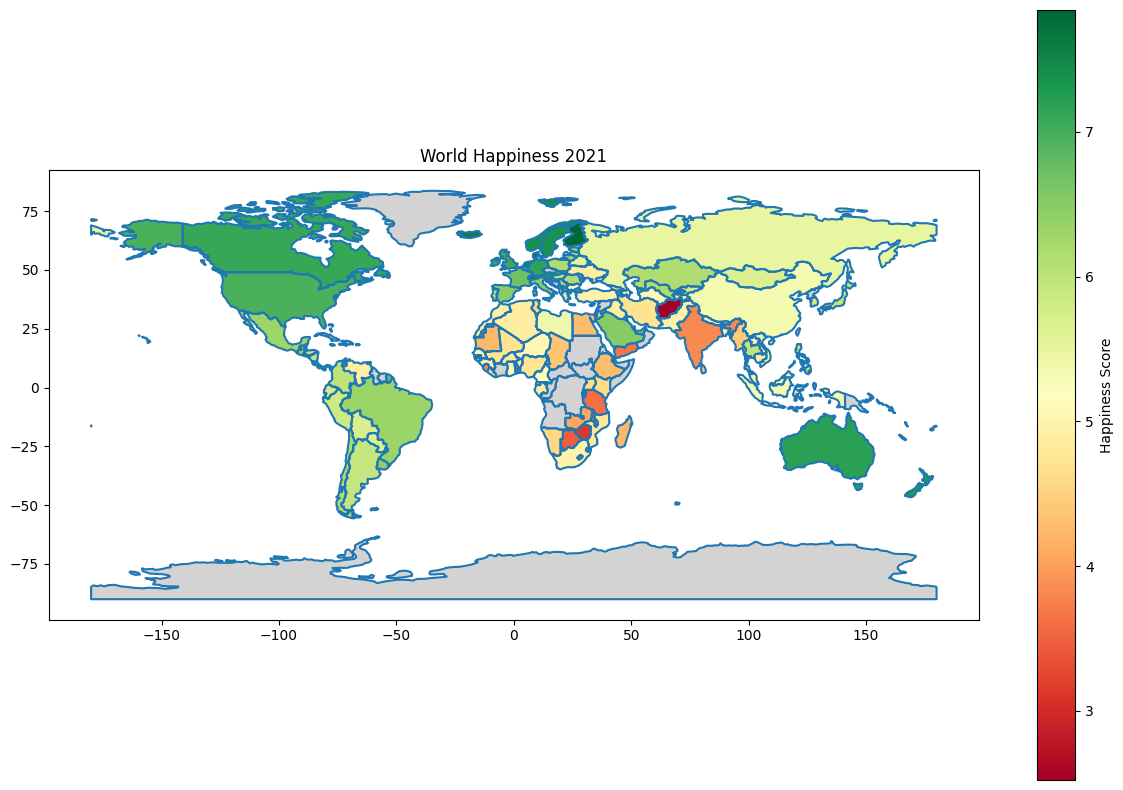

/var/folders/kd/sys88dj522s2xrww72wp0yqr0000gn/T/ipykernel_30435/2931110078.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


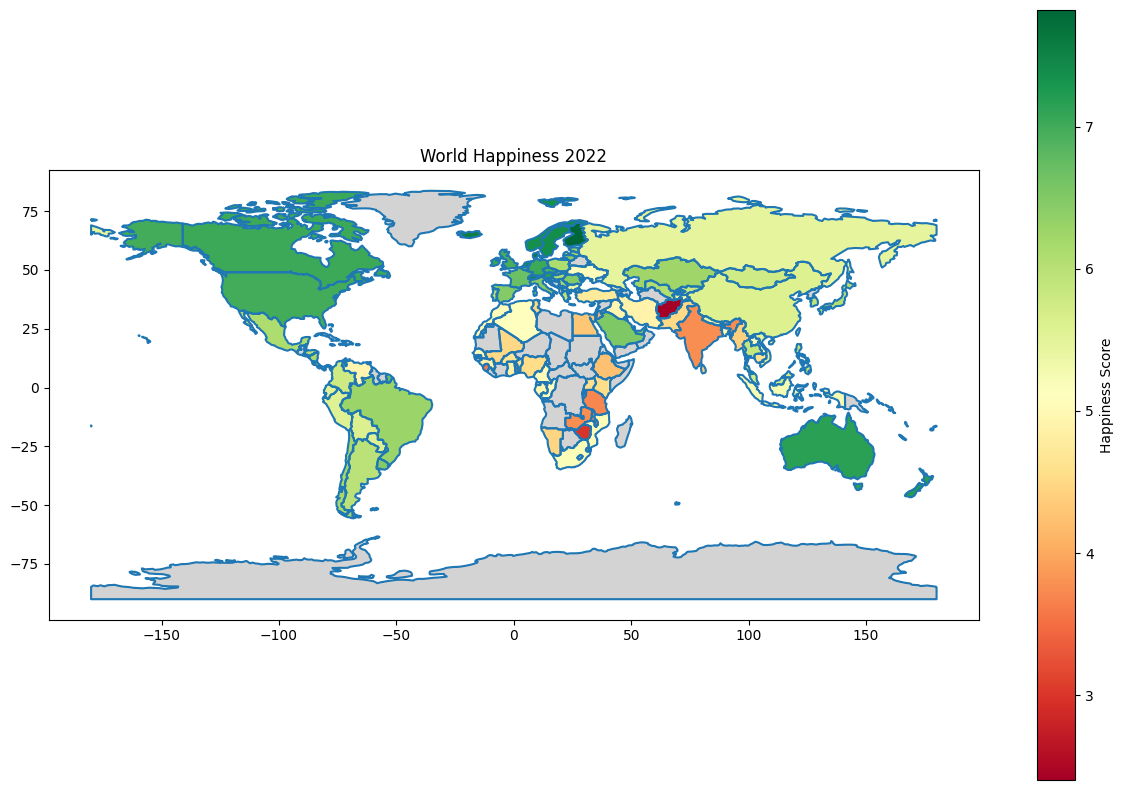

/var/folders/kd/sys88dj522s2xrww72wp0yqr0000gn/T/ipykernel_30435/2931110078.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


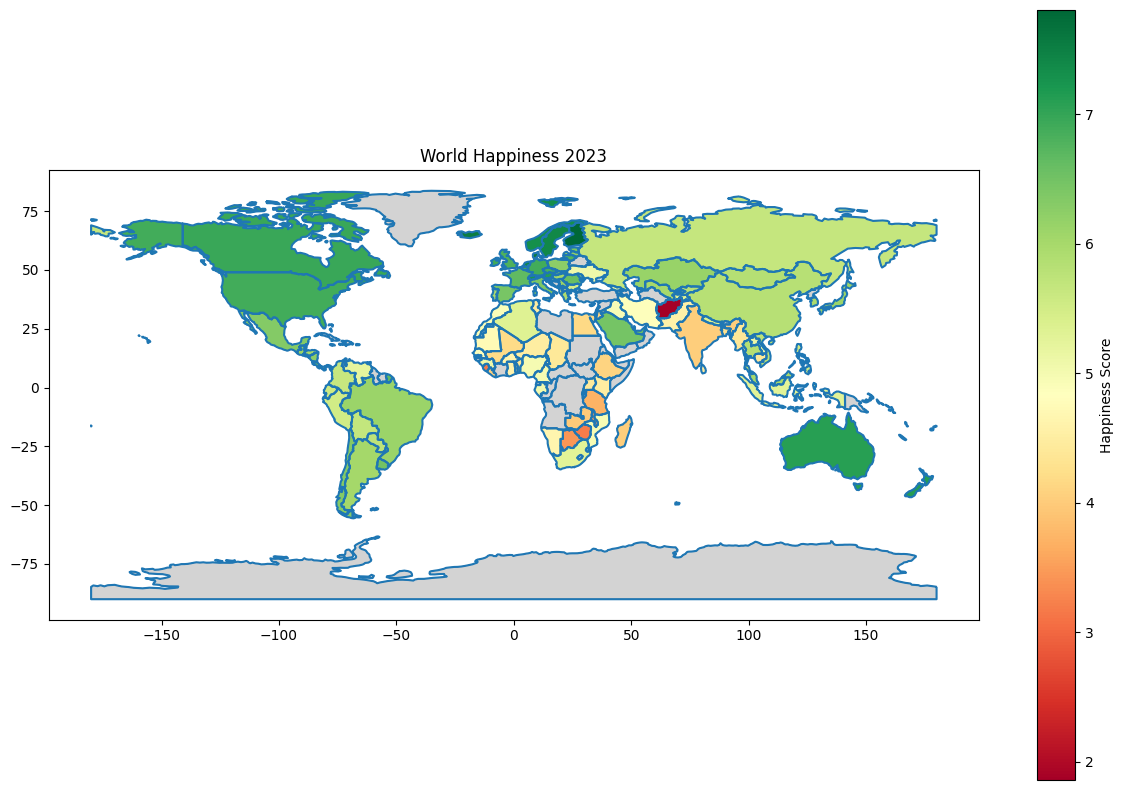

pop_est      continent                 name iso_a3  gdp_md_est  \
0       889953.0        Oceania                 Fiji    FJI        5496   
1     58005463.0         Africa             Tanzania    TZA       63177   
2       603253.0         Africa            W. Sahara    ESH         907   
3     37589262.0  North America               Canada    CAN     1736425   
4    328239523.0  North America        United States    USA    21433226   
..           ...            ...                  ...    ...         ...   
172    6944975.0         Europe               Serbia    SRB       51475   
173     622137.0         Europe           Montenegro    MNE        5542   
174    1794248.0         Europe               Kosovo    -99        7926   
175    1394973.0  North America  Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa             S. Sudan    SSD       11998   

                                              geometry        Country  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...            NaN   
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...       Tanzania   
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...            NaN   
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...         Canada   
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  United States   
..                                                 ...            ...   
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...         Serbia   
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...     Montenegro   
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...         Kosovo   
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...            NaN   
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...            NaN   

                         Region   Rank  Happiness Score  GDP per Capita  \
0                           NaN    NaN              NaN             NaN   
1            Sub-Saharan Africa  129.0            3.694           0.836   
2                           NaN    NaN              NaN             NaN   
3                 North America   13.0            6.961           1.881   
4                 North America   15.0            6.894           1.980   
..                          ...    ...              ...             ...   
172  Central and Eastern Europe   45.0            6.144           1.552   
173  Central and Eastern Europe   67.0            5.722           1.537   
174  Central and Eastern Europe   34.0            6.368           1.374   
175                         NaN    NaN              NaN             NaN   
176                         NaN    NaN              NaN             NaN   

     Family Social Support  Health Life Expectancy  Freedom  \
0                      NaN                     NaN      NaN   
1                    0.653                 0.59401    0.838   
2                      NaN                     NaN      NaN   
3                    0.929                 0.71400    0.874   
4                    0.919                 0.65850    0.800   
..                     ...                     ...      ...   
172                  0.873                 0.67088    0.845   
173                  0.890                 0.67100    0.805   
174                  0.844                 0.65195    0.861   
175                    NaN                     NaN      NaN   
176                    NaN                     NaN      NaN   

     Trust Government Corruption  Generosity    Year  
0                            NaN         NaN     NaN  
1                          0.554       0.182  2023.0  
2                            NaN         NaN     NaN  
3                          0.420       0.153  2023.0  
4                          0.689       0.137  2023.0  
..                           ...         ...     ...  
172                        0.816       0.204  2023.0  
173                        0.844       0.063  2023.0  
174                        0.866       0.259  2023.0  
175                    

In [53]:

for year in range(2015,2024):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    country_mapping = {
        'United States of America': 'United States'
    }
    
    world['name'] = world['name'].map(country_mapping).fillna(world['name'])
    
    world = world.merge(whr_merged_sliced[whr_merged_sliced['Year']==year], how="left", left_on="name", right_on="Country")
    
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world.boundary.plot(ax=ax)
    world.plot(column='Happiness Score', ax=ax, legend=True,
               legend_kwds={'label': "Happiness Score"},
               cmap='RdYlGn', edgecolor='black', linewidth=0.5,
               missing_kwds={'color': 'lightgrey'})
    
    plt.title(f'World Happiness {year}')
    plt.show()
world

In [49]:
whr_merged_sliced[whr_merged_sliced['Year']==2023]

Country                        Region   Rank  Happiness Score  \
1230           Finland                Western Europe    1.0            7.804   
1231           Denmark                Western Europe    2.0            7.586   
1232           Iceland                Western Europe    3.0            7.530   
1233            Israel  Middle East and North Africa    4.0            7.473   
1234       Netherlands                Western Europe    5.0            7.403   
...                ...                           ...    ...              ...   
1362  Congo (Kinshasa)            Sub-Saharan Africa  133.0            3.207   
1363          Zimbabwe            Sub-Saharan Africa  134.0            3.204   
1364      Sierra Leone            Sub-Saharan Africa  135.0            3.138   
1365           Lebanon  Middle East and North Africa  136.0            2.392   
1366       Afghanistan      South and Southeast Asia  137.0            1.859   

      GDP per Capita  Family Social Support  Health Life Expectancy  Freedom  \
1230           1.888                  0.969                 0.71150    0.961   
1231           1.949                  0.954                 0.71250    0.934   
1232           1.926                  0.983                 0.72050    0.936   
1233           1.833                  0.943                 0.72697    0.809   
1234           1.942                  0.930                 0.71550    0.887   
...              ...                    ...                     ...      ...   
1362           0.531                  0.652                 0.55375    0.664   
1363           0.758                  0.690                 0.54050    0.654   
1364           0.670                  0.555                 0.54900    0.660   
1365           1.417                  0.530                 0.66149    0.474   
1366           0.645                  0.341                 0.54712    0.382   

      Trust Government Corruption  Generosity  Year  
1230                        0.182      -0.019  2023  
1231                        0.196       0.134  2023  
1232                        0.668       0.211  2023  
1233                        0.708      -0.023  2023  
1234                        0.379       0.213  2023  
...                           ...         ...   ...  
1362                        0.834       0.086  2023  
1363                        0.766      -0.046  2023  
1364                        0.858       0.105  2023  
1365                        0.891      -0.141  2023  
1366                        0.847      -0.081  2023  

[137 rows x 11 columns]

In [50]:
world[world['name']=='Greenland']

pop_est      continent       name iso_a3  gdp_md_est  \
22  56225.0  North America  Greenland    GRL        3051   

                                             geometry Country Region  Rank  \
22  POLYGON ((-46.76379 82.62796, -43.40644 83.225...     NaN    NaN   NaN   

    Happiness Score  GDP per Capita  Family Social Support  \
22              NaN             NaN                    NaN   

    Health Life Expectancy  Freedom  Trust Government Corruption  Generosity  \
22                     NaN      NaN                          NaN         NaN   

    Year  
22   NaN